In [1]:
import os
import mlflow
from mlflow.tracking.client import MlflowClient
import re

from utils import get_results_dict, get_metrics_history_df

In [2]:
mlflow_tracking_uri = "file:///home/akira/Desktop/p-poteka/poteka-pipeline-pytorch/mlruns"
mlflow.set_tracking_uri(mlflow_tracking_uri)
mlflow_experiment_id = "10"
save_img_dir_path = f"./results/{mlflow_experiment_id}/r2_score/standard"

os.makedirs(save_img_dir_path, exist_ok=True)

In [3]:
standard_eval_runs = MlflowClient().search_runs(mlflow_experiment_id, filter_string="tags.mlflow.project.entryPoint = 'evaluate'")
print(f"standard evaluate runs count: {len(standard_eval_runs)}")

standard evaluate runs count: 14


In [4]:
standard_results_dict = get_results_dict(standard_eval_runs)

In [5]:
# Visualze result
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

all_sample_rmse = standard_results_dict["all_sample_rmse"]
all_sample_rmse_df = pd.DataFrame({"tag": all_sample_rmse.keys(), "value": all_sample_rmse.values()})
all_sample_rmse_df = all_sample_rmse_df.set_index("tag")
print(all_sample_rmse_df.sort_values("value", ascending=True))

                                        value
tag                                          
Rain                                 5.999778
RainTemperature                      6.071658
RainWind                             6.091893
RainTemperatureWindAbs_wind          6.126290
RainTemperatureWind                  6.129678
RainTemperatureHumidity              6.166768
RainHumidityWind                     6.168993
RainTemperatureHumidityWind          6.171023
RainHumidityAbs_wind                 6.262616
RainTemperatureAbs_wind              6.266640
RainTemperatureHumidityAbs_wind      6.274959
RainHumidity                         6.288895
RainTemperatureHumidityWindAbs_wind  6.319340
RainHumidityWindAbs_wind             6.431899


In [6]:
ten_minutes_prediction_rmse = standard_results_dict["ten_minutes_prediction_rmse"]
ten_minutes_prediction_rmse_df = pd.DataFrame({"tag": ten_minutes_prediction_rmse.keys(), "value": ten_minutes_prediction_rmse.values()})
ten_minutes_prediction_rmse_df = ten_minutes_prediction_rmse_df.set_index("tag")
print(ten_minutes_prediction_rmse_df.sort_values("value", ascending=True))

                                        value
tag                                          
Rain                                 2.196696
RainTemperatureHumidity              2.285349
RainTemperatureHumidityAbs_wind      2.302249
RainWind                             2.316904
RainHumidityWind                     2.395472
RainHumidityAbs_wind                 2.414306
RainHumidity                         2.422598
RainTemperatureHumidityWind          2.490931
RainTemperatureWind                  2.491908
RainTemperatureAbs_wind              2.498875
RainTemperatureWindAbs_wind          2.512176
RainTemperatureHumidityWindAbs_wind  2.539502
RainTemperature                      2.574987
RainHumidityWindAbs_wind             2.695506


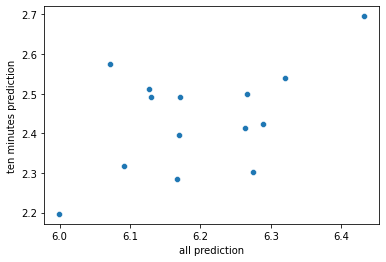

In [7]:
df = pd.concat([all_sample_rmse_df, ten_minutes_prediction_rmse_df], axis=1)
df.columns = ["all prediction", "ten minutes prediction"]
sns.scatterplot(data=df, x="all prediction", y="ten minutes prediction")

FileNotFoundError: [Errno 2] No such file or directory: './standard_img/TC_case_2020-10-12_5-0_start.png'

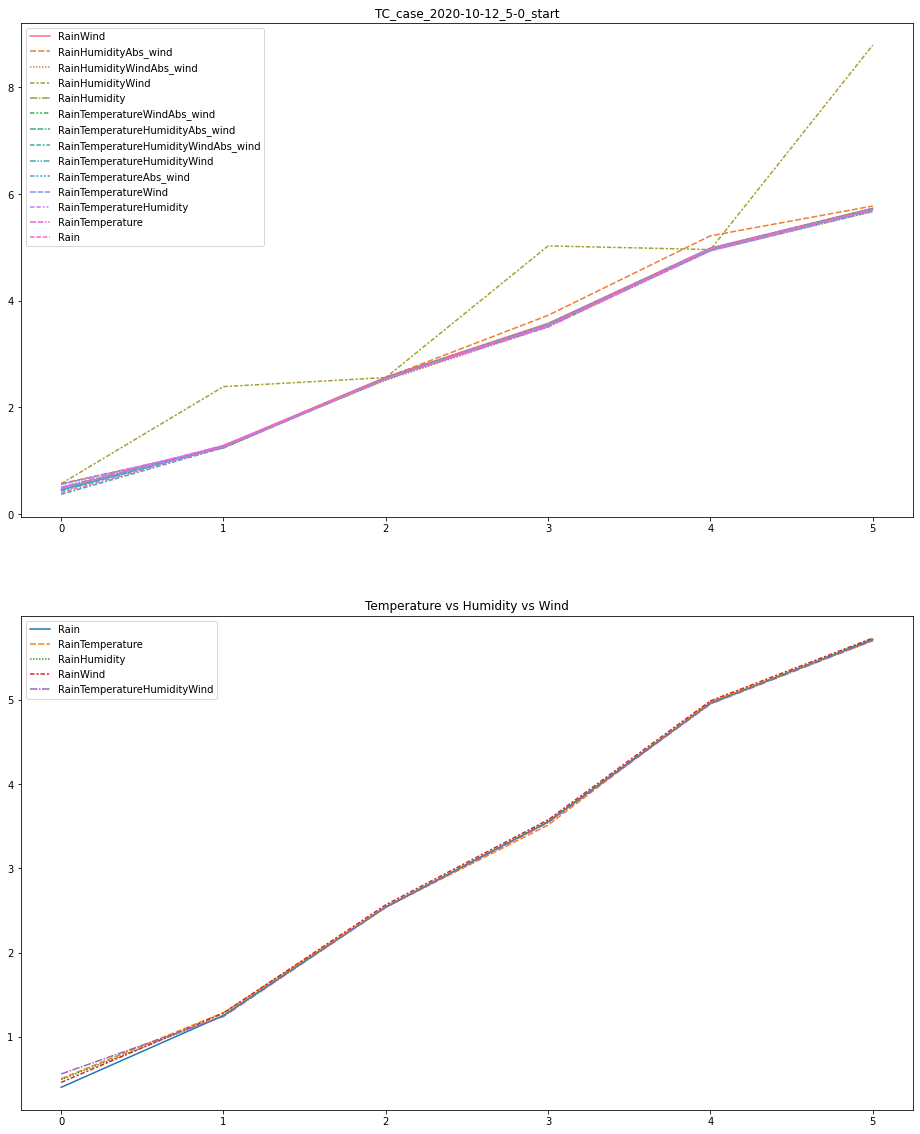

In [9]:
# TC case result

tc_case_rmses = standard_results_dict["tc_case_rmses"]
case_names = list(tc_case_rmses["Rain"].keys())
for case_name in case_names:
    df = pd.DataFrame()
    for key, case_result in tc_case_rmses.items():
        target_metrics_dic = case_result[case_name]
        df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    
    # Visualize
    fig, ax = plt.subplots(2, 1, figsize=(16, 20))
    ax = ax.flatten()
    # Compare with all input parameters
    sns.lineplot(data=df, ax=ax[0])
    ax[0].set_title(case_name)
    
    # Select target parameters
    target_cols = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
    sns.lineplot(data=df[target_cols], ax=ax[1])
    ax[1].set_title("Temperature vs Humidity vs Wind")
    
    plt.savefig(f"./standard_img/{case_name}.png")
    
#     # Compare with temperature
#     ## Temperature
#     hue_columns = [i for i in df.columns if "Temperature" in i]
#     other_columns = [i for i in df.columns if "Temperature" not in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[1], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[1], x=df.index, y=col, color="blue")
#     ax[1].set_title("It includes temperature (orange) or not (blue)")
#     ## Humidity
#     hue_columns = [i for i in df.columns if "Humidity" in i]
#     other_columns = [i for i in df.columns if "Humidity" not in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[2], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[2], x=df.index, y=col, color="blue")
#     ax[2].set_title("It includes humidity (orange) or not (blue)")
    
#     ## Wind (Wind & Abs_wind)
#     hue_columns = [i for i in df.columns if "Wind" in i or "Abs_wind" in i]
#     other_columns = [i for i in df.columns if "Wind" not in i or "Abs_wind" in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[3], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[3], x=df.index, y=col, color="blue")
#     ax[3].set_title("It includes wind (orange) or not (blue)")
    
    plt.show()
    plt.close()

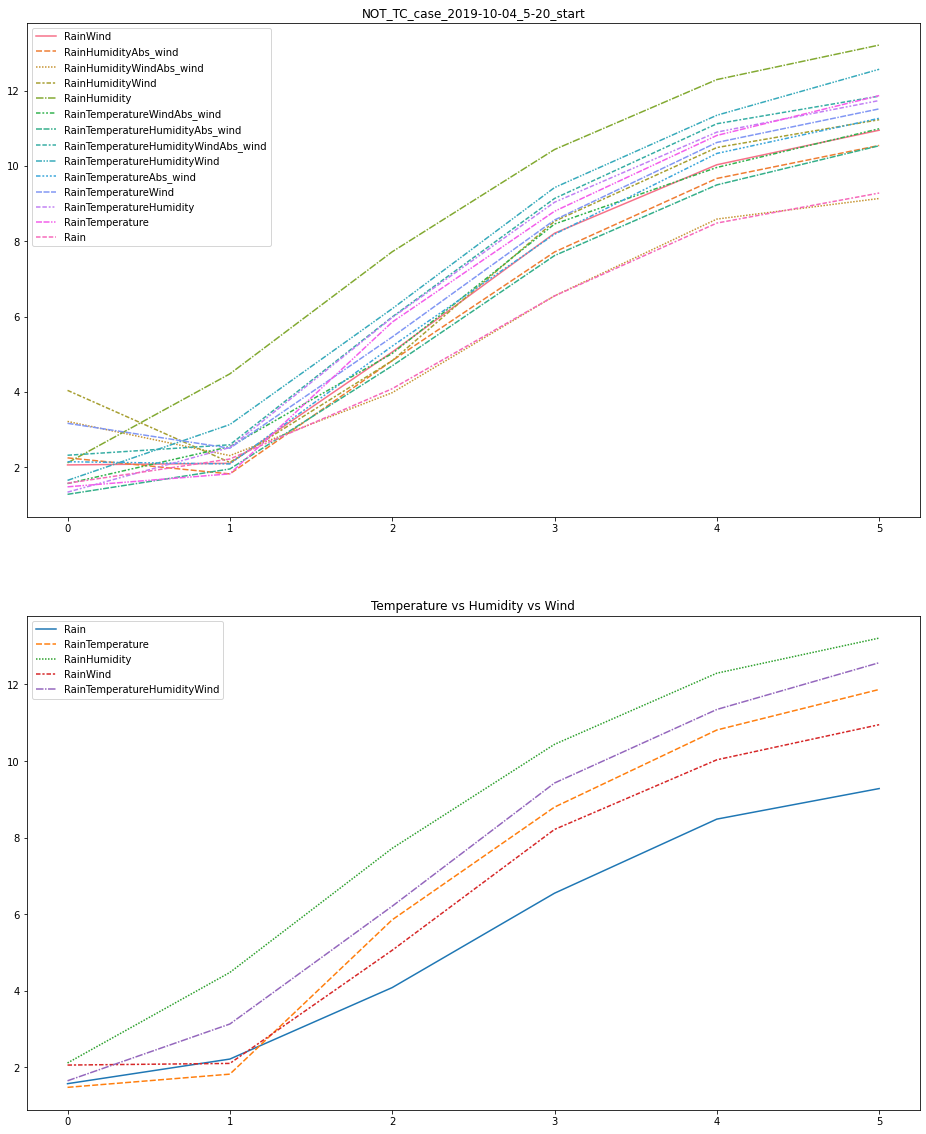

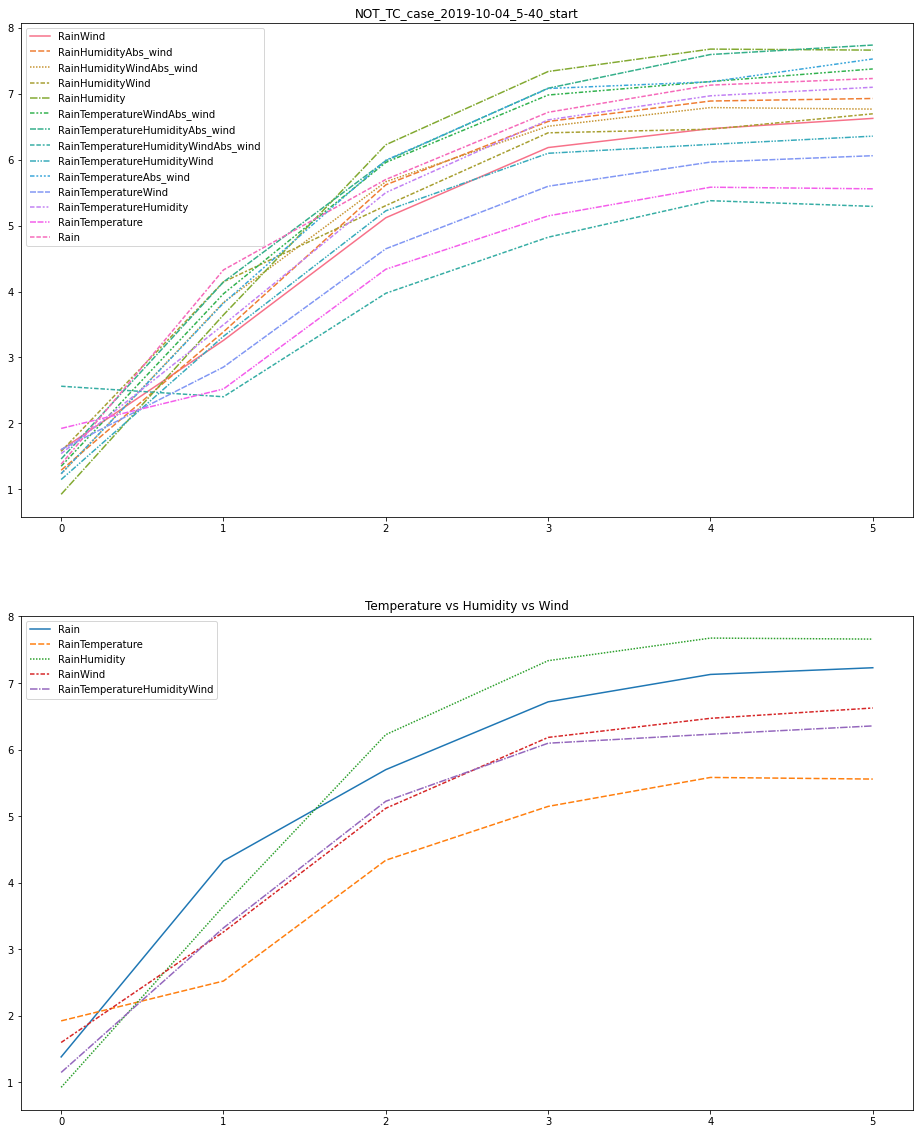

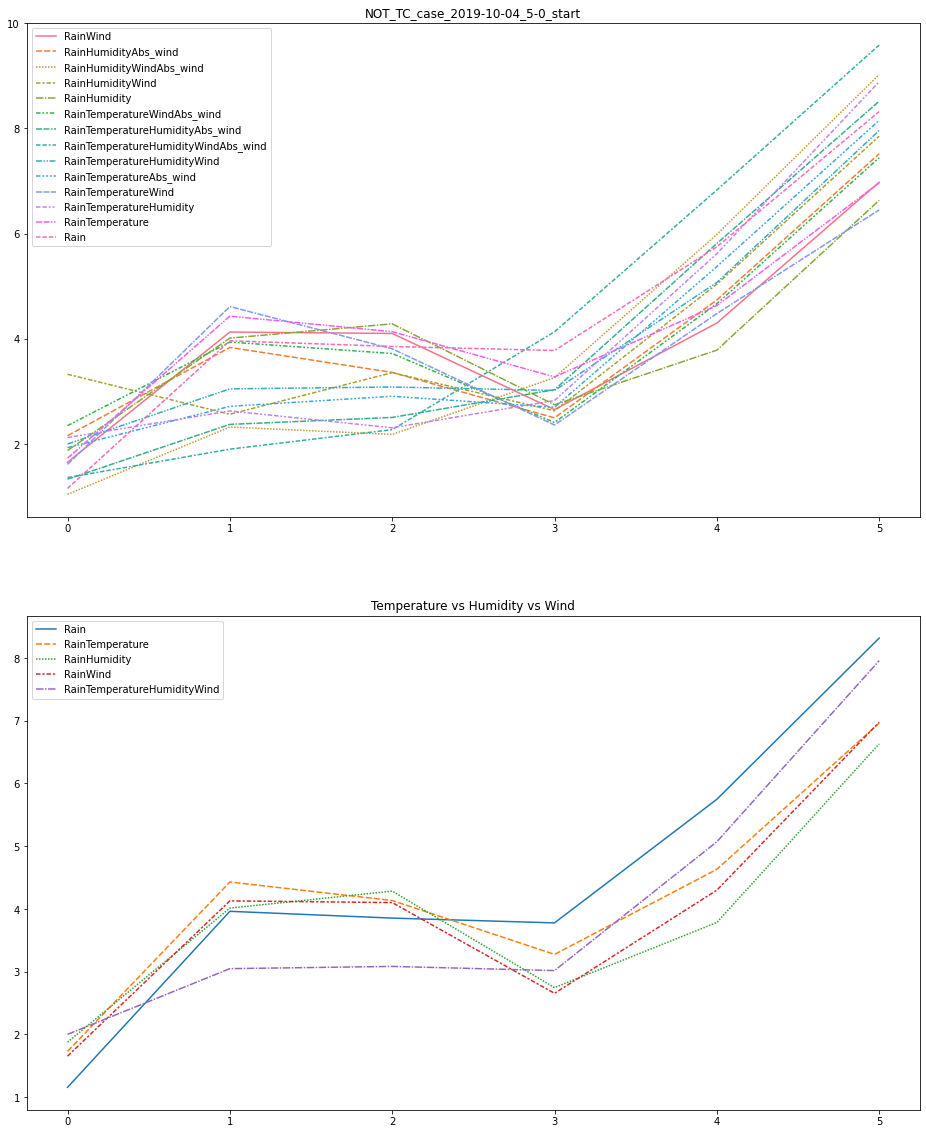

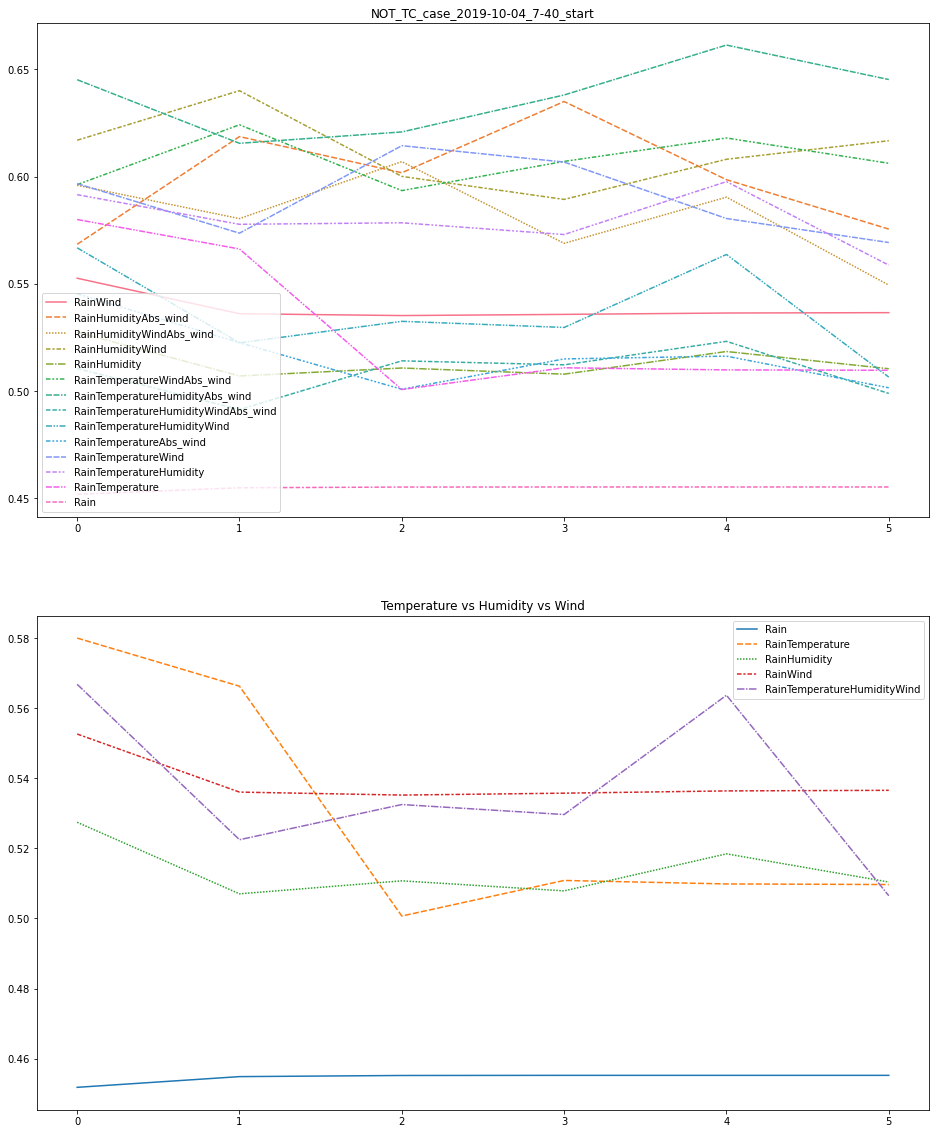

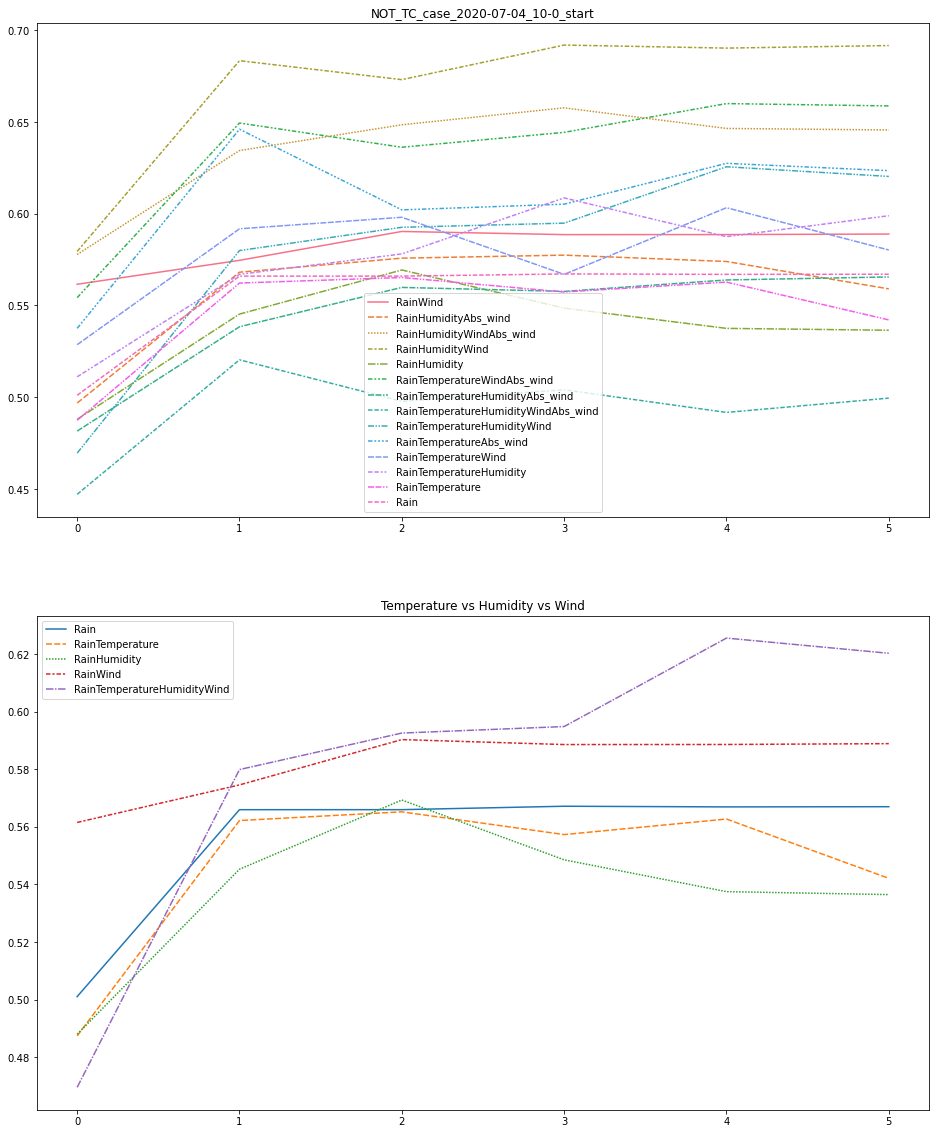

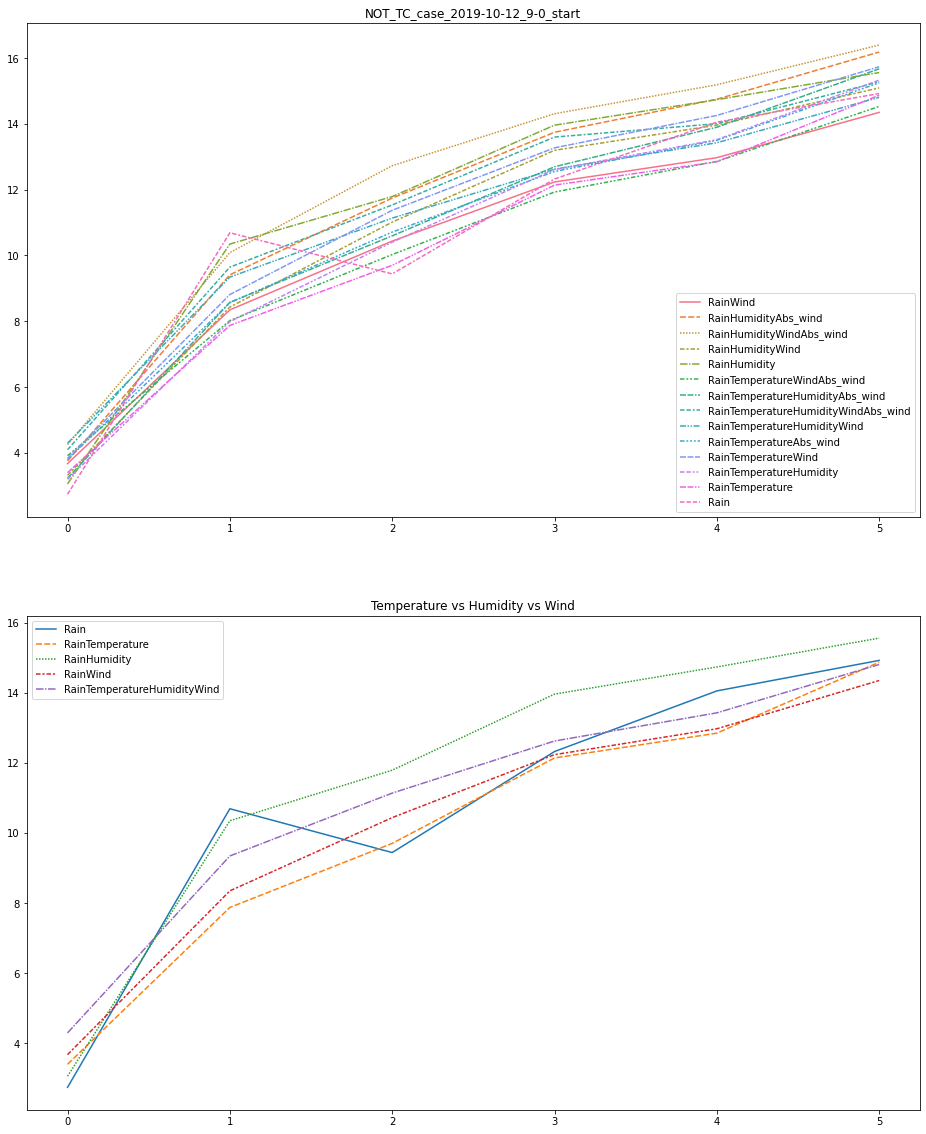

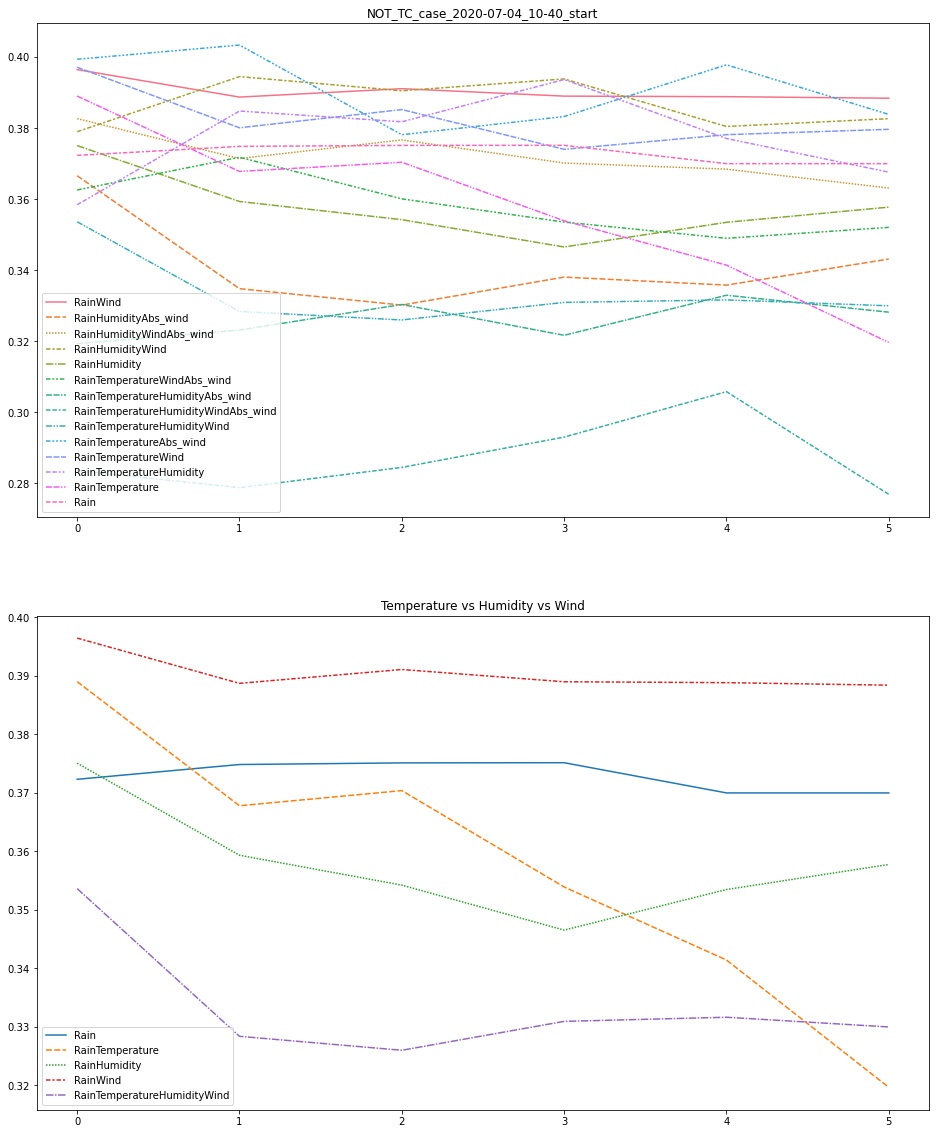

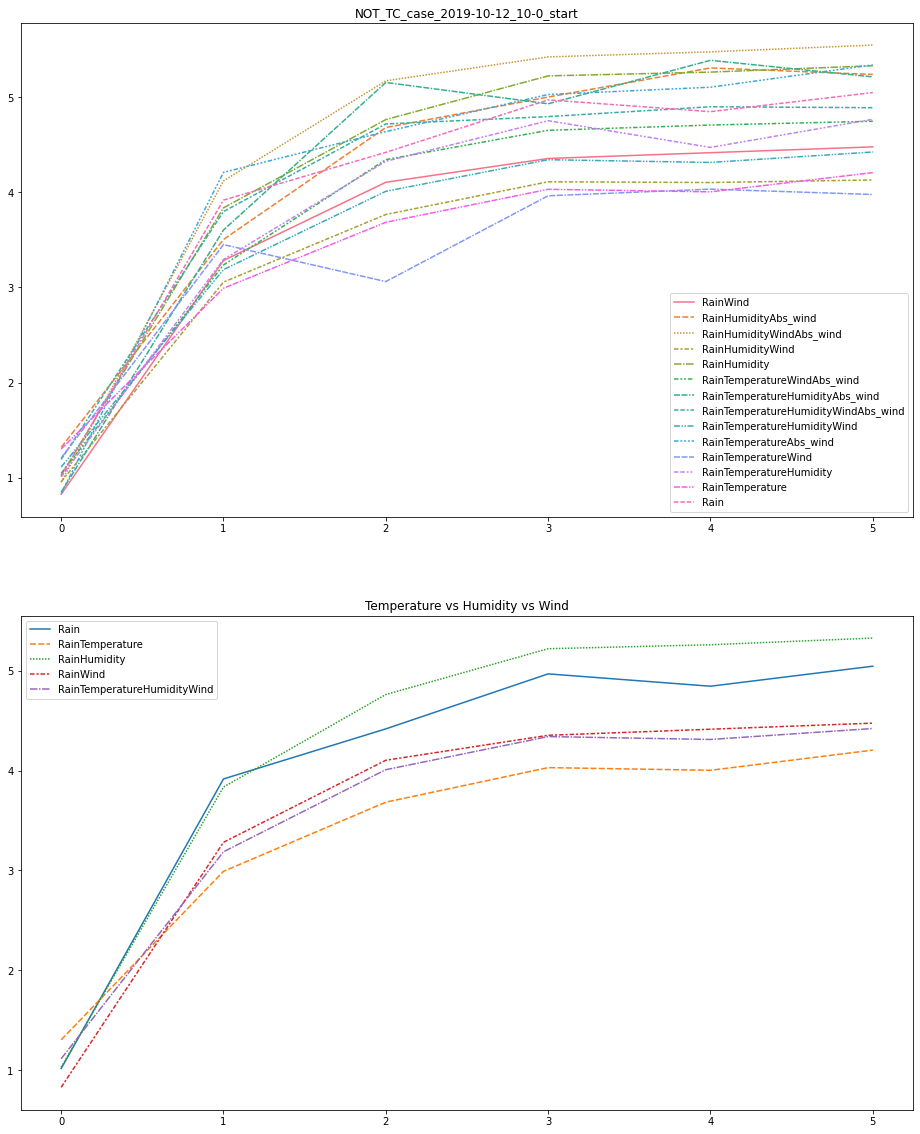

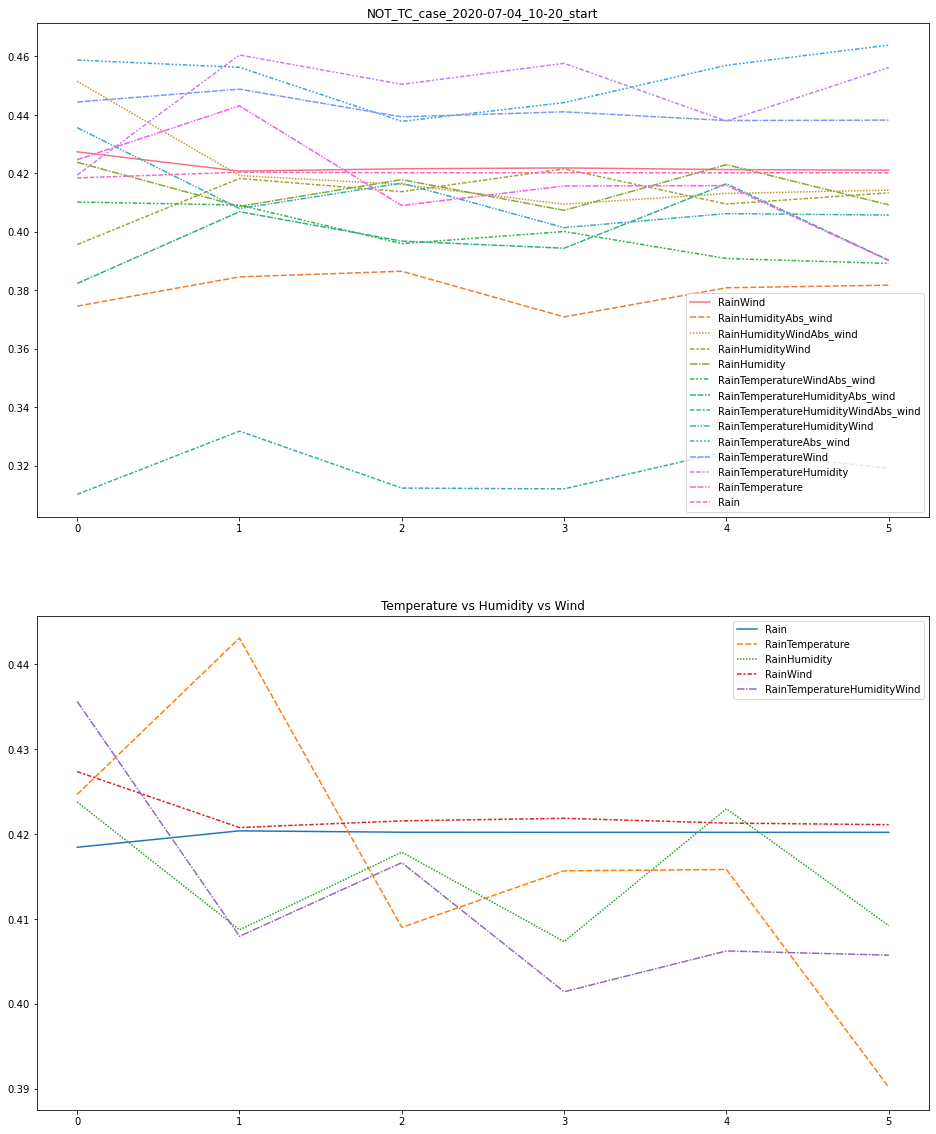

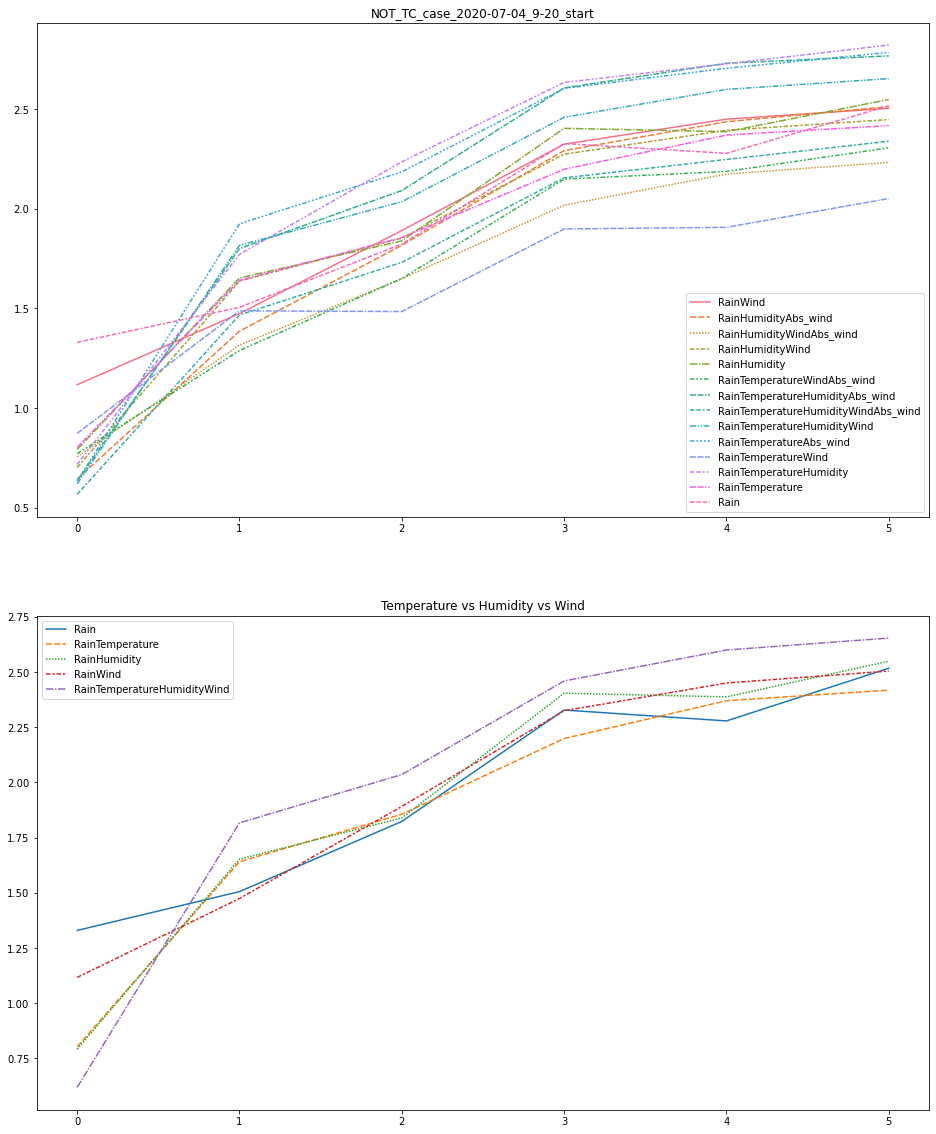

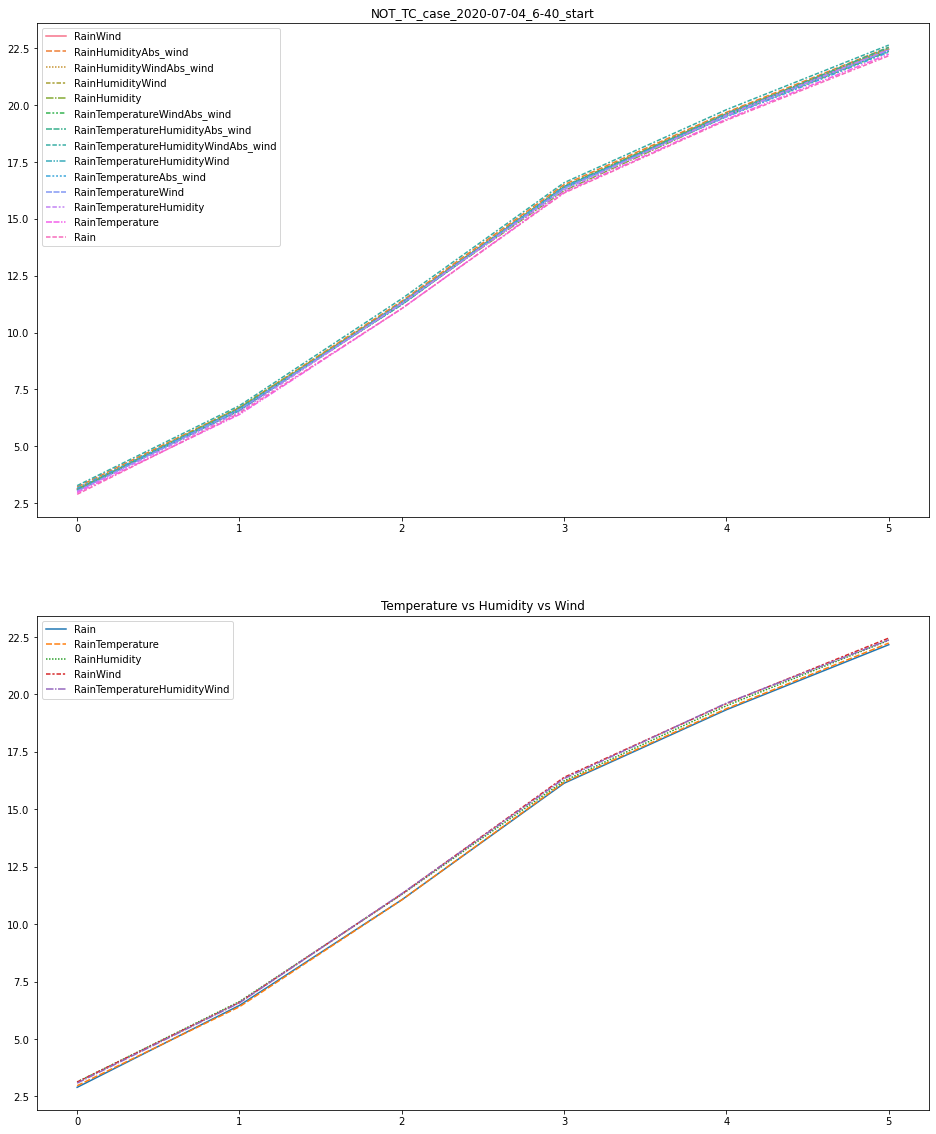

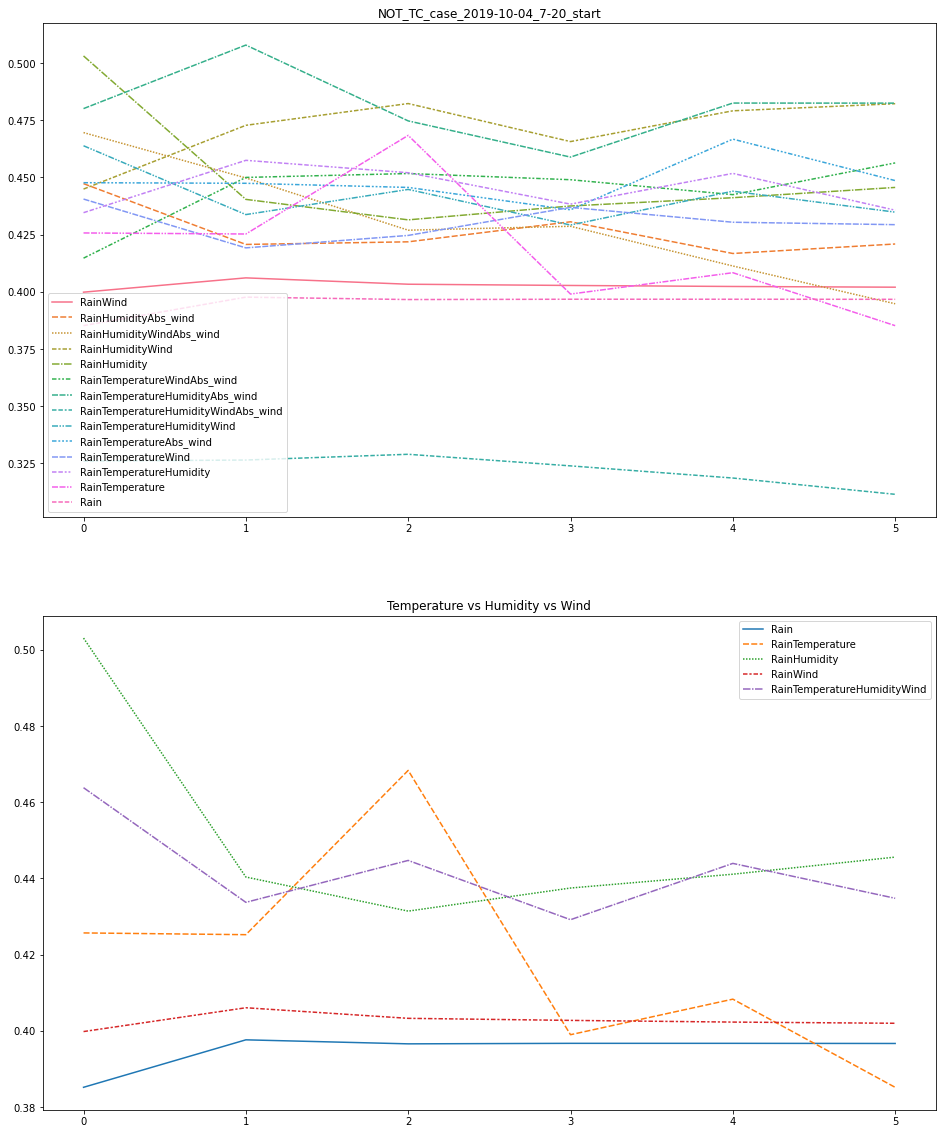

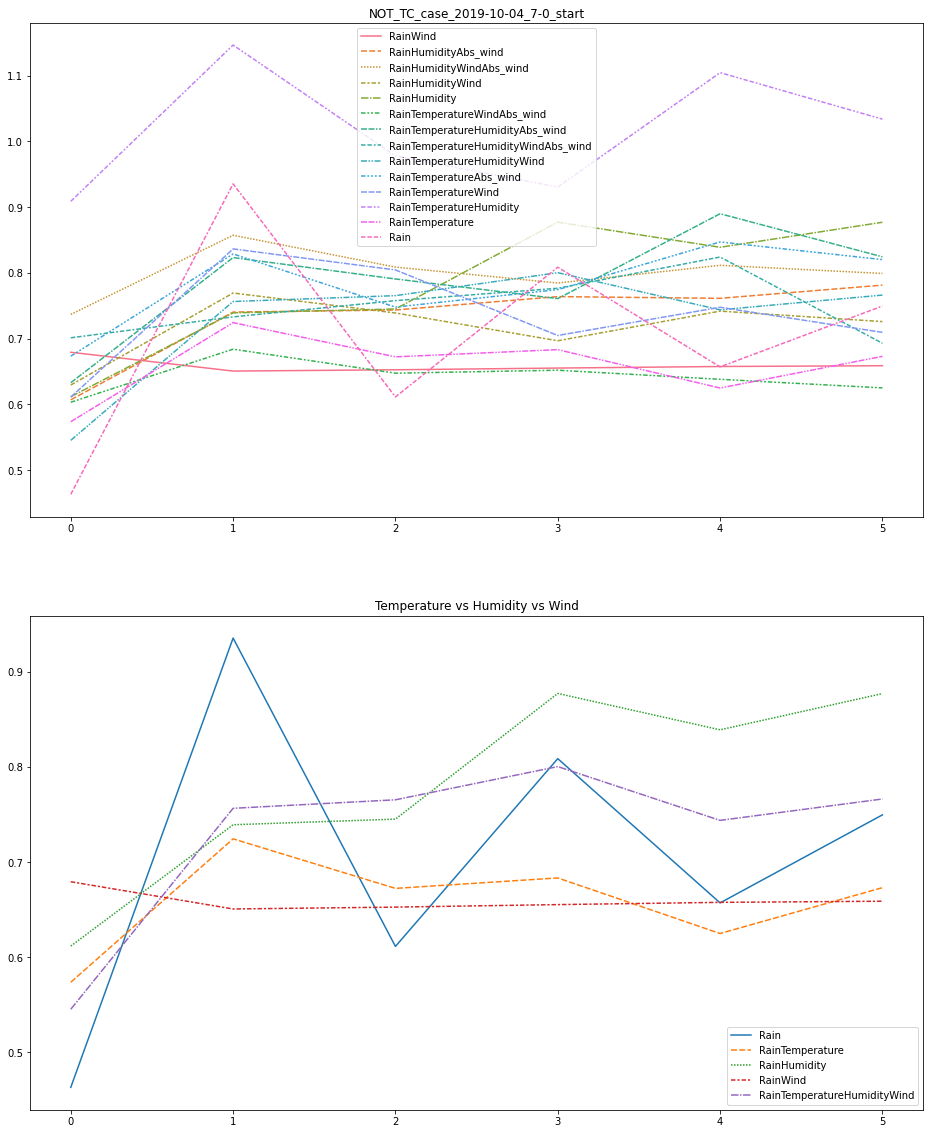

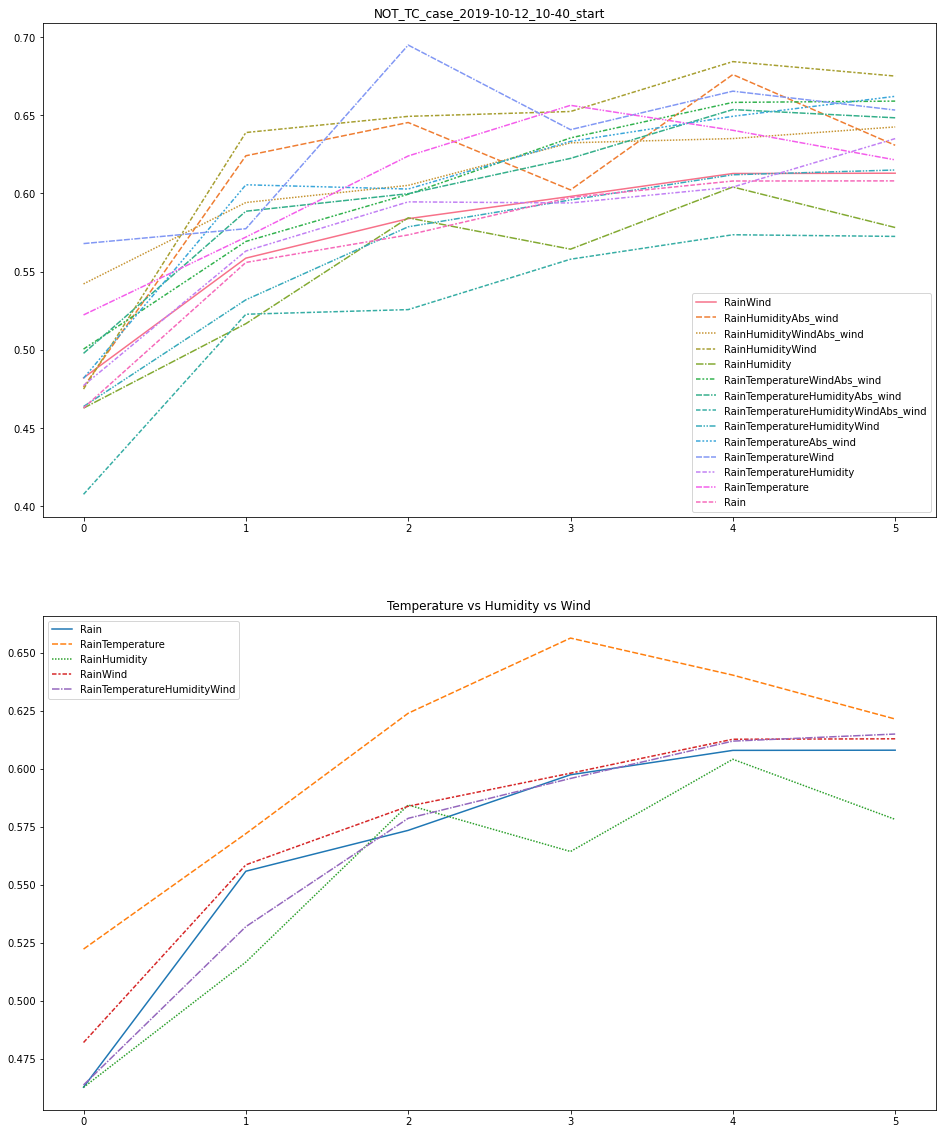

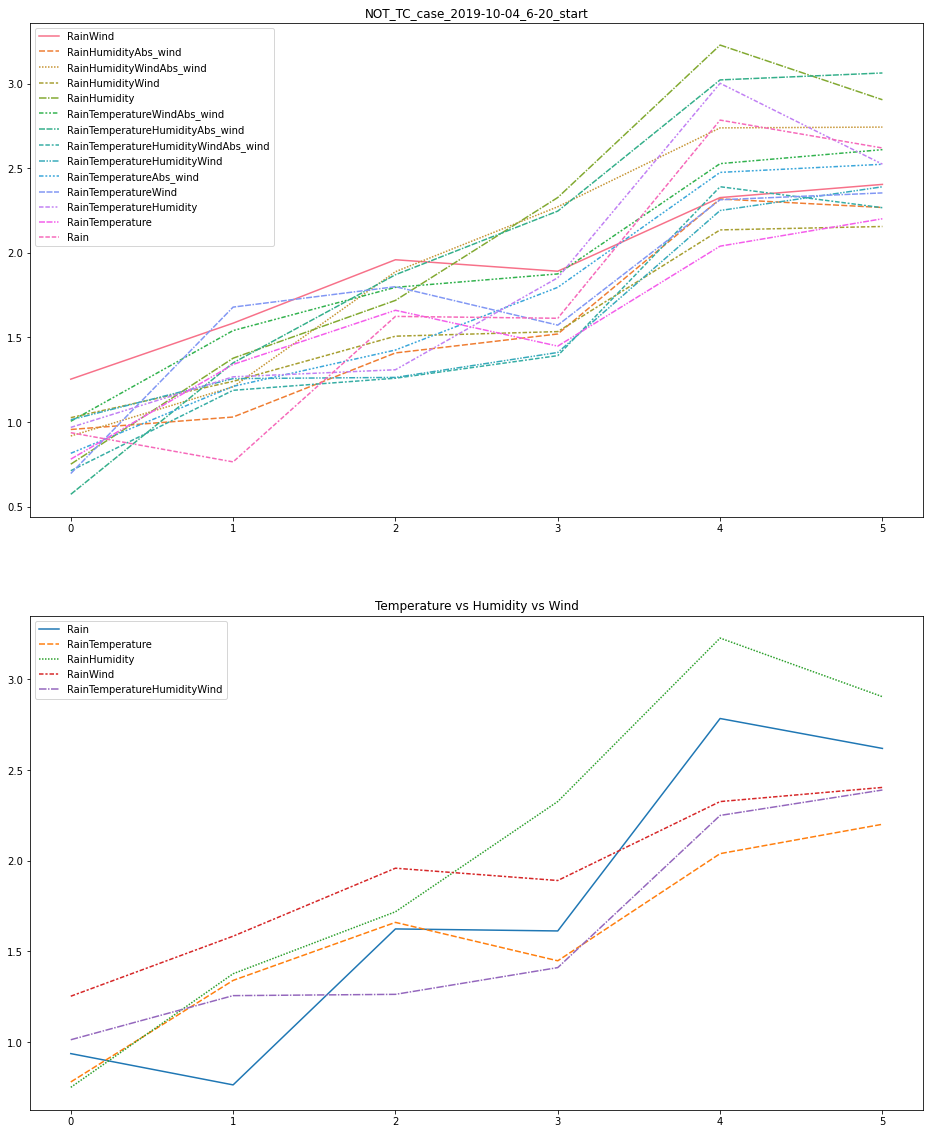

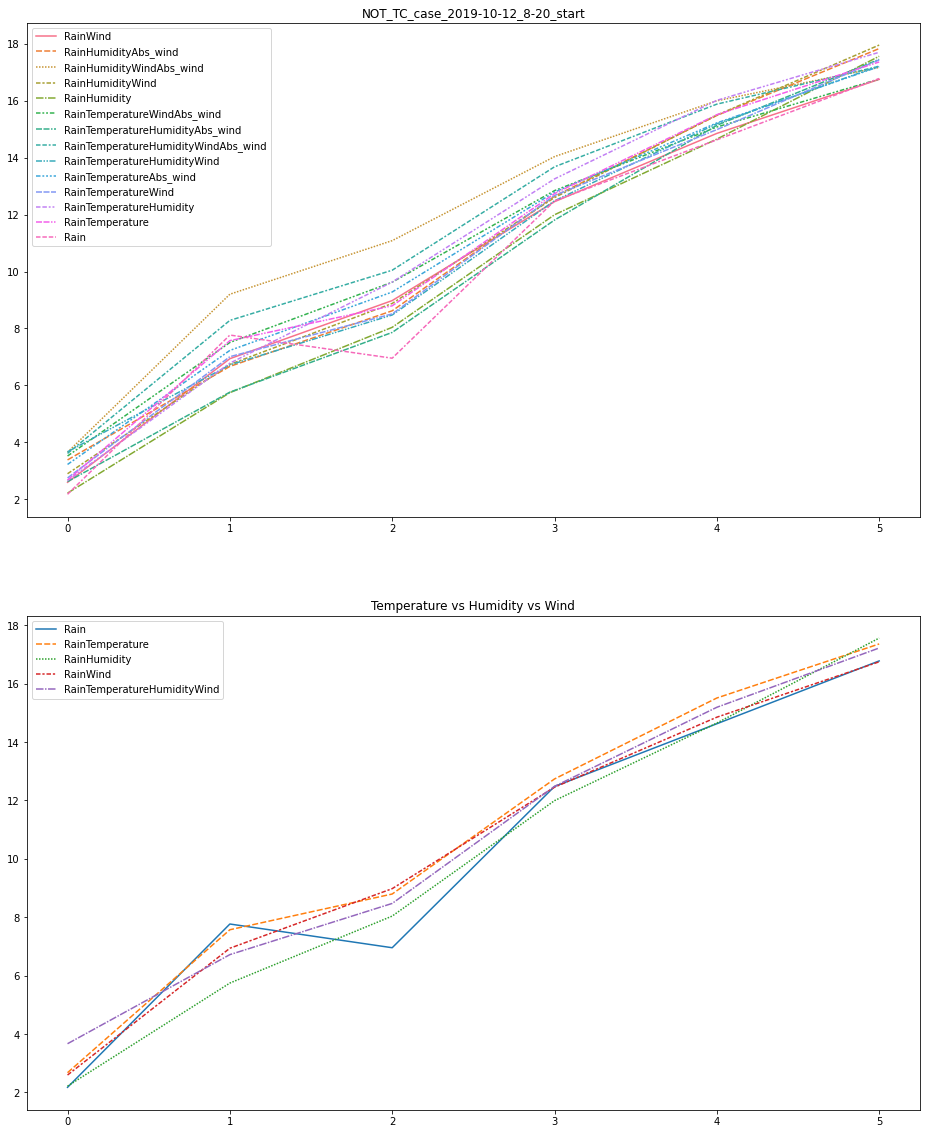

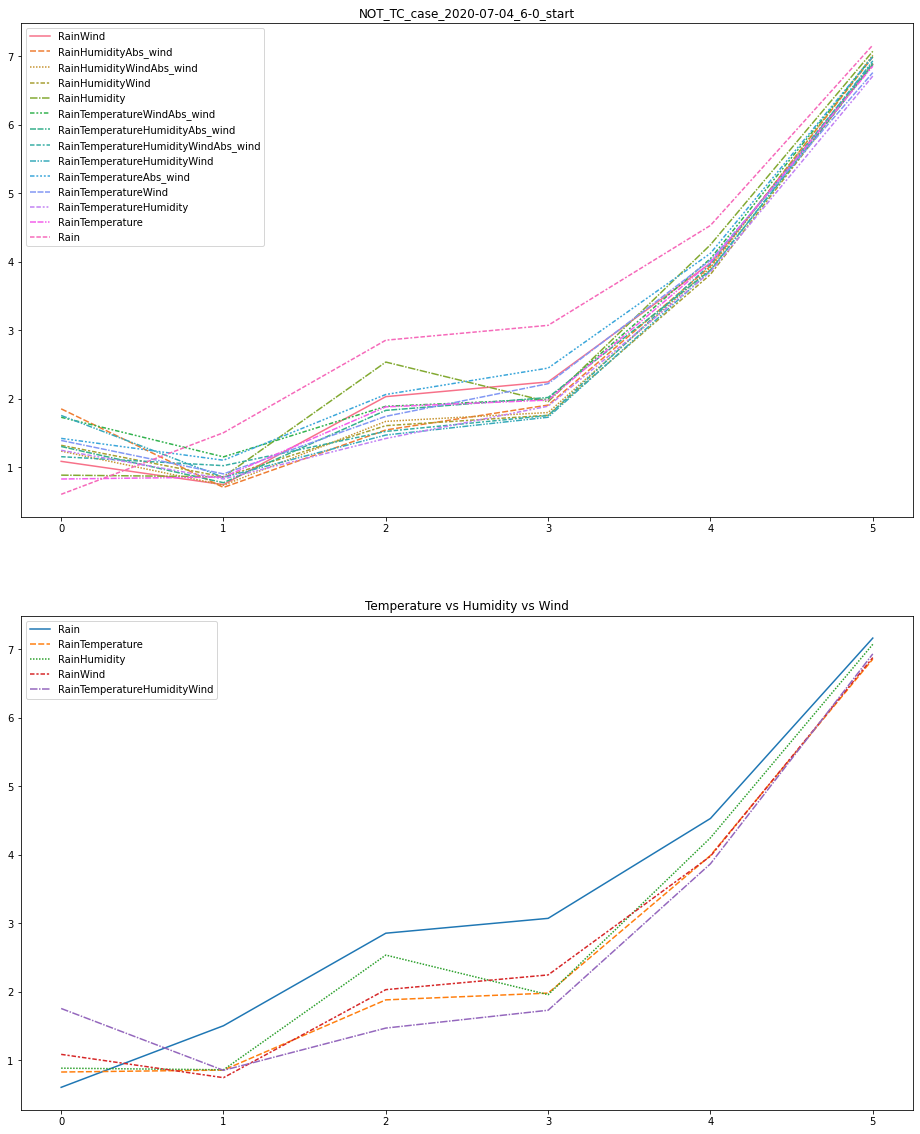

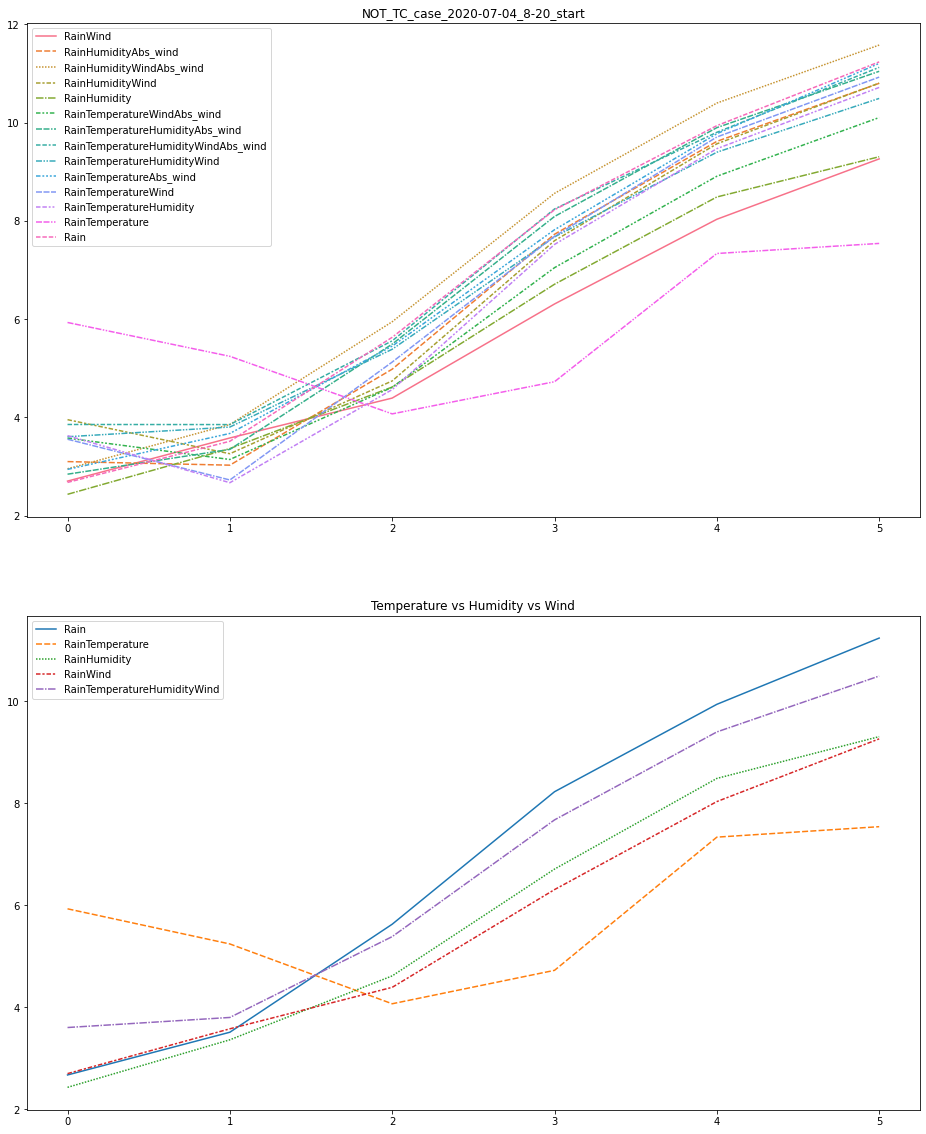

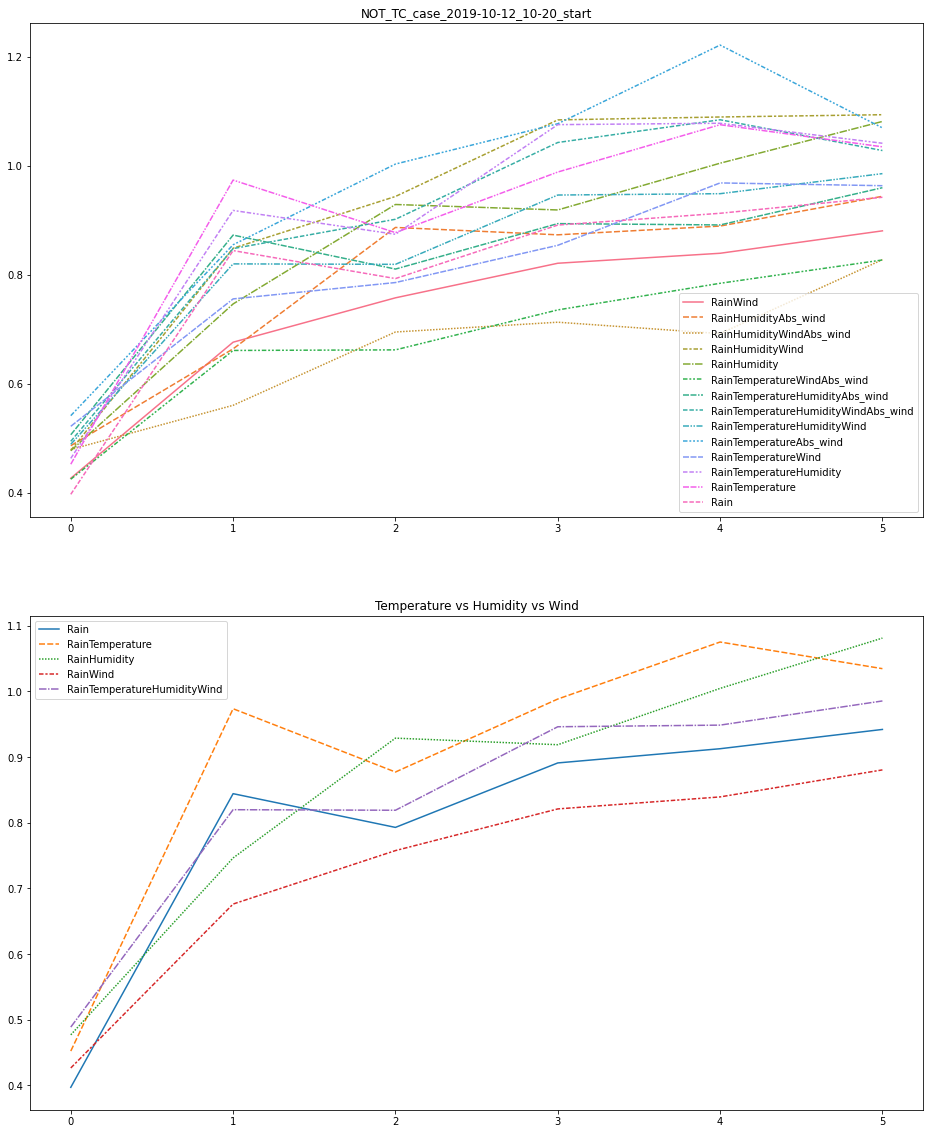

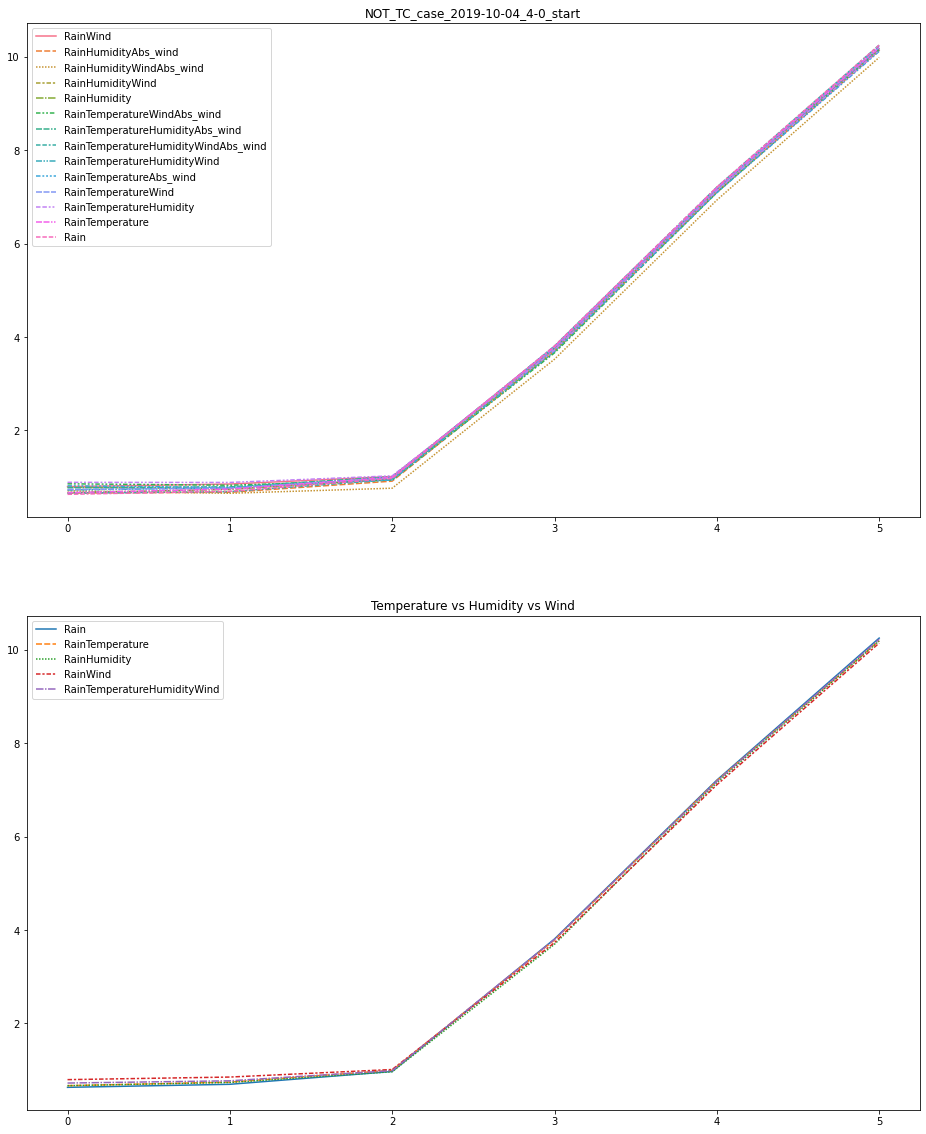

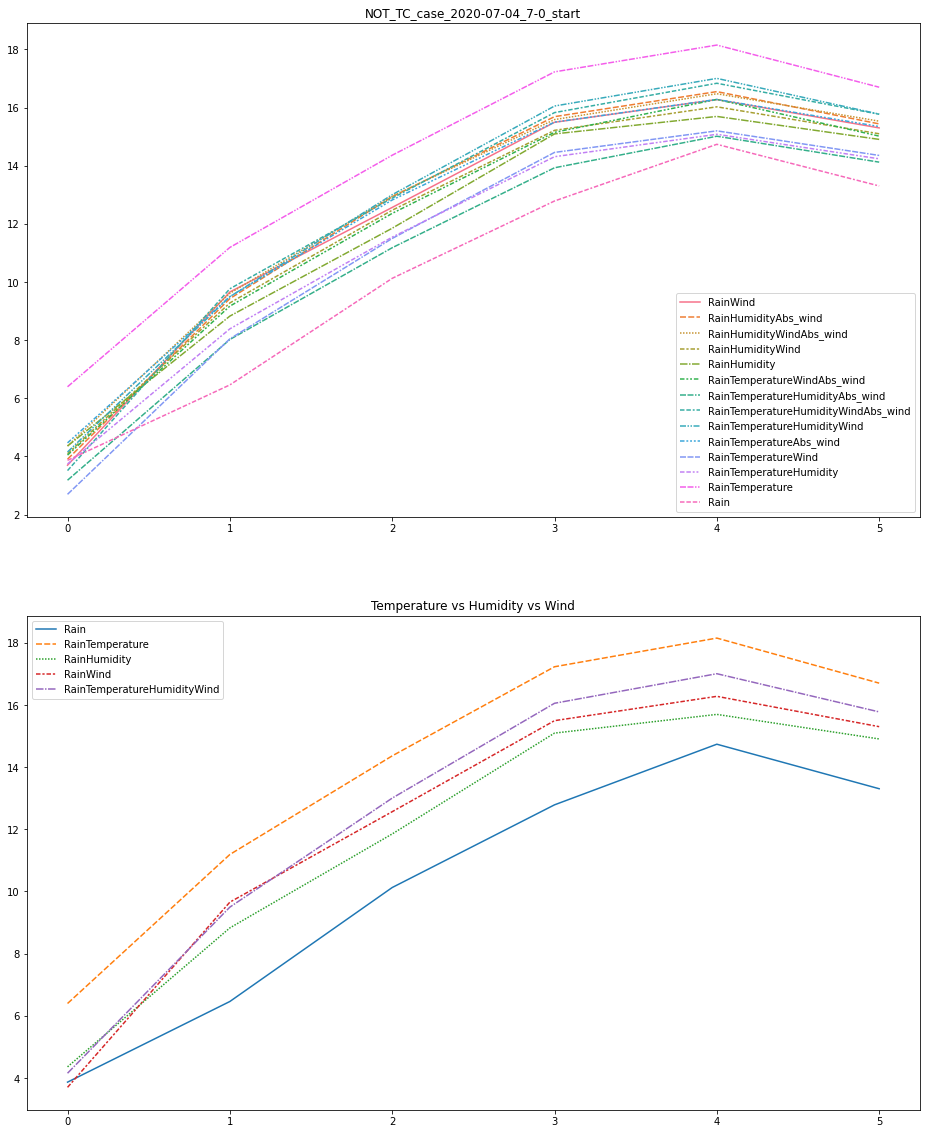

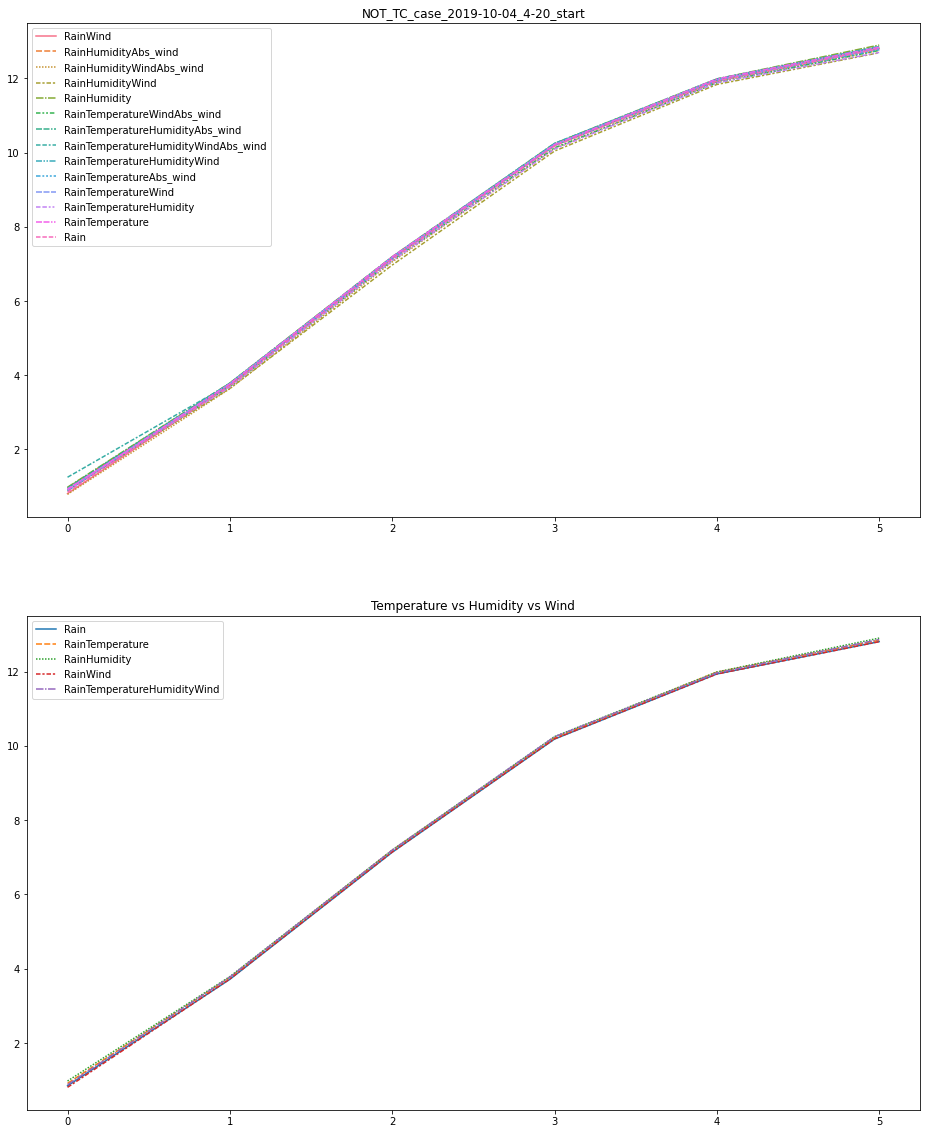

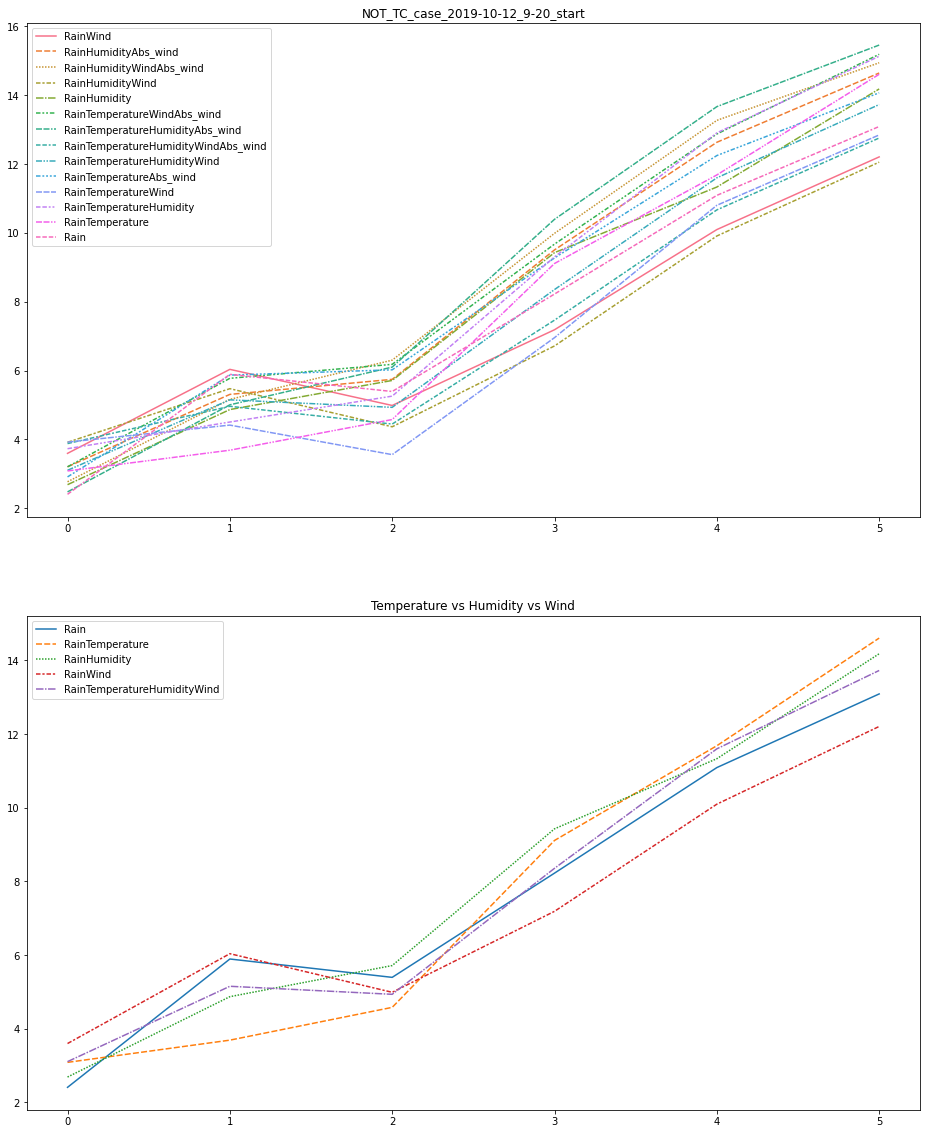

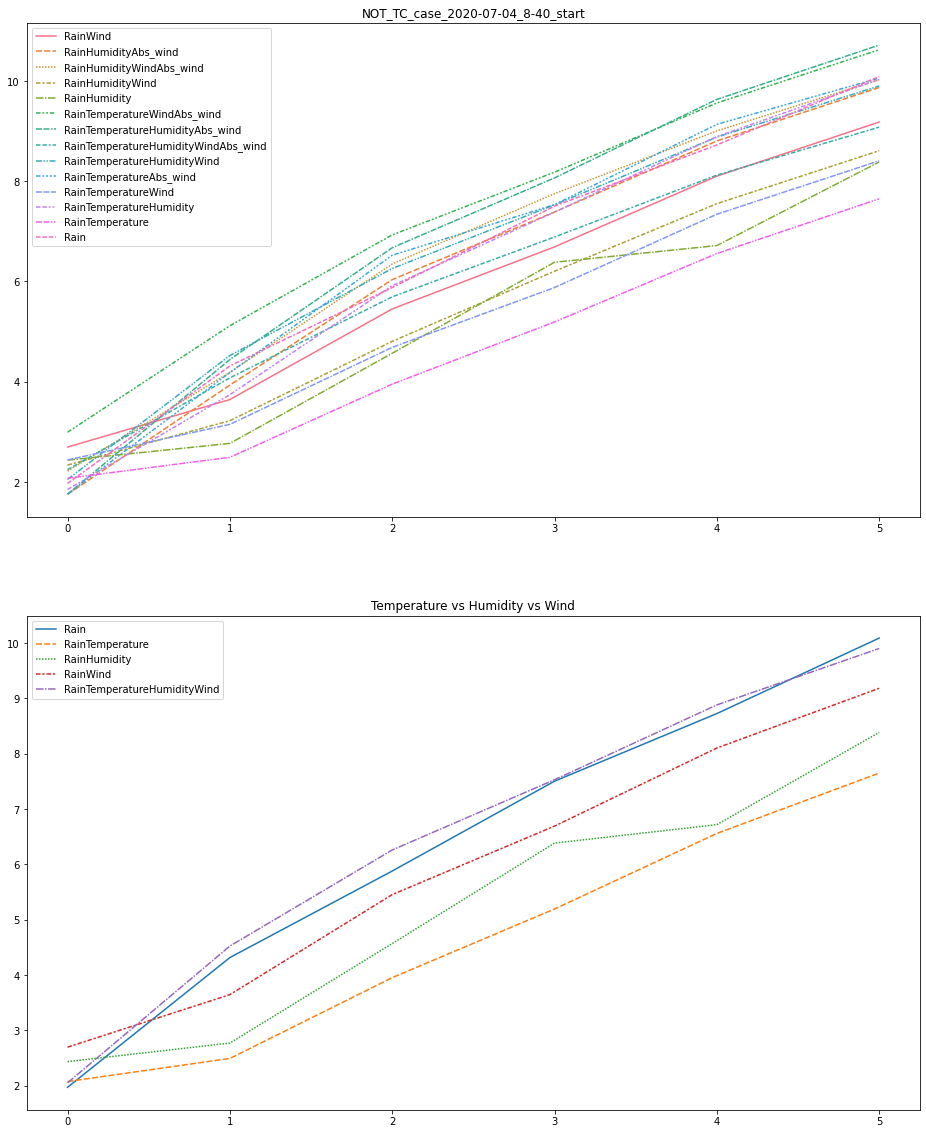

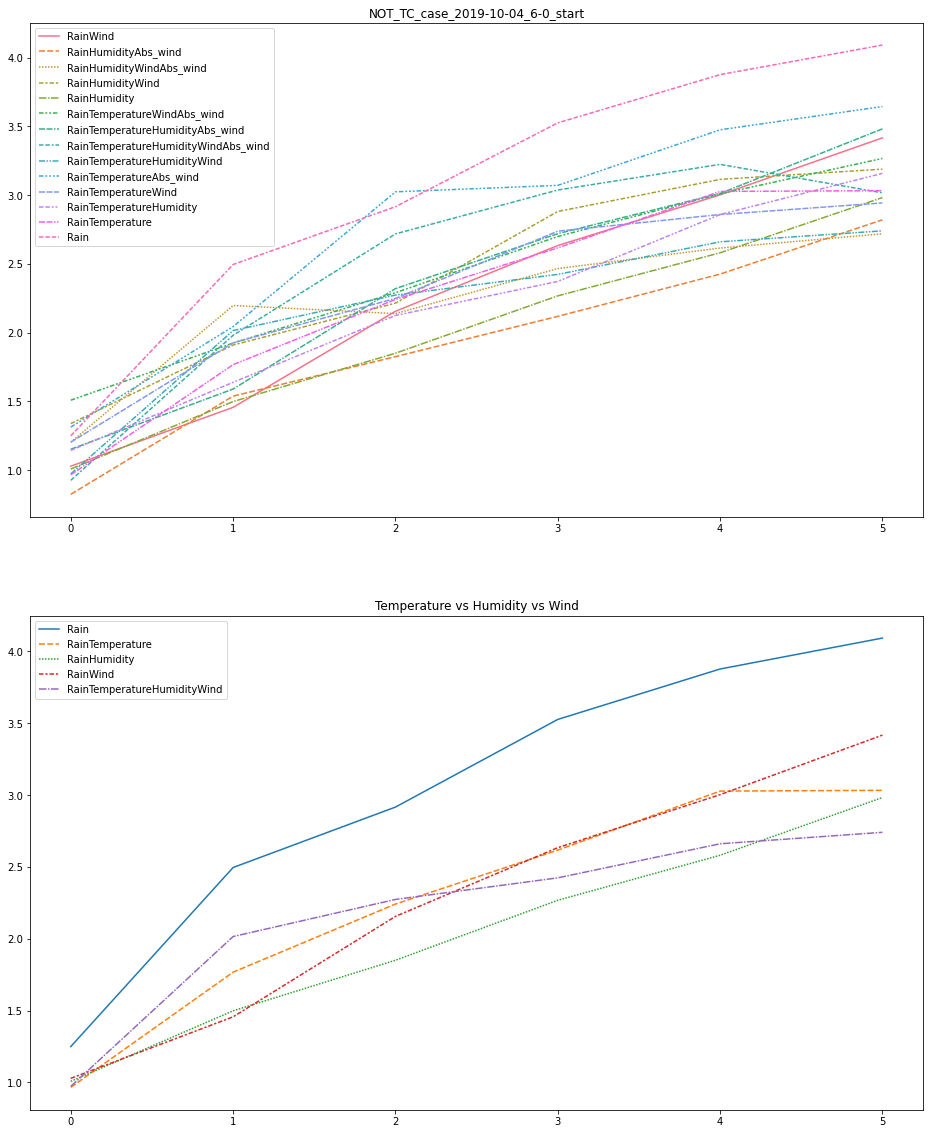

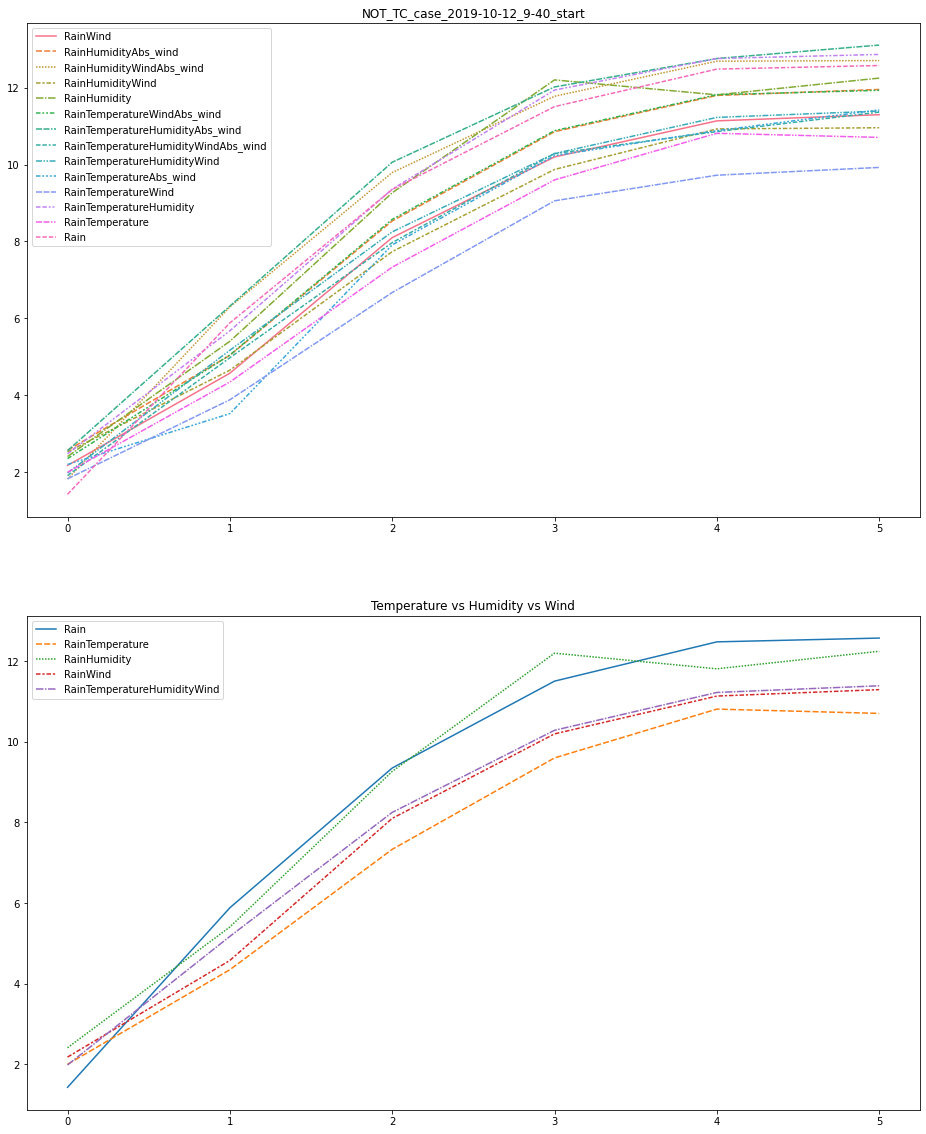

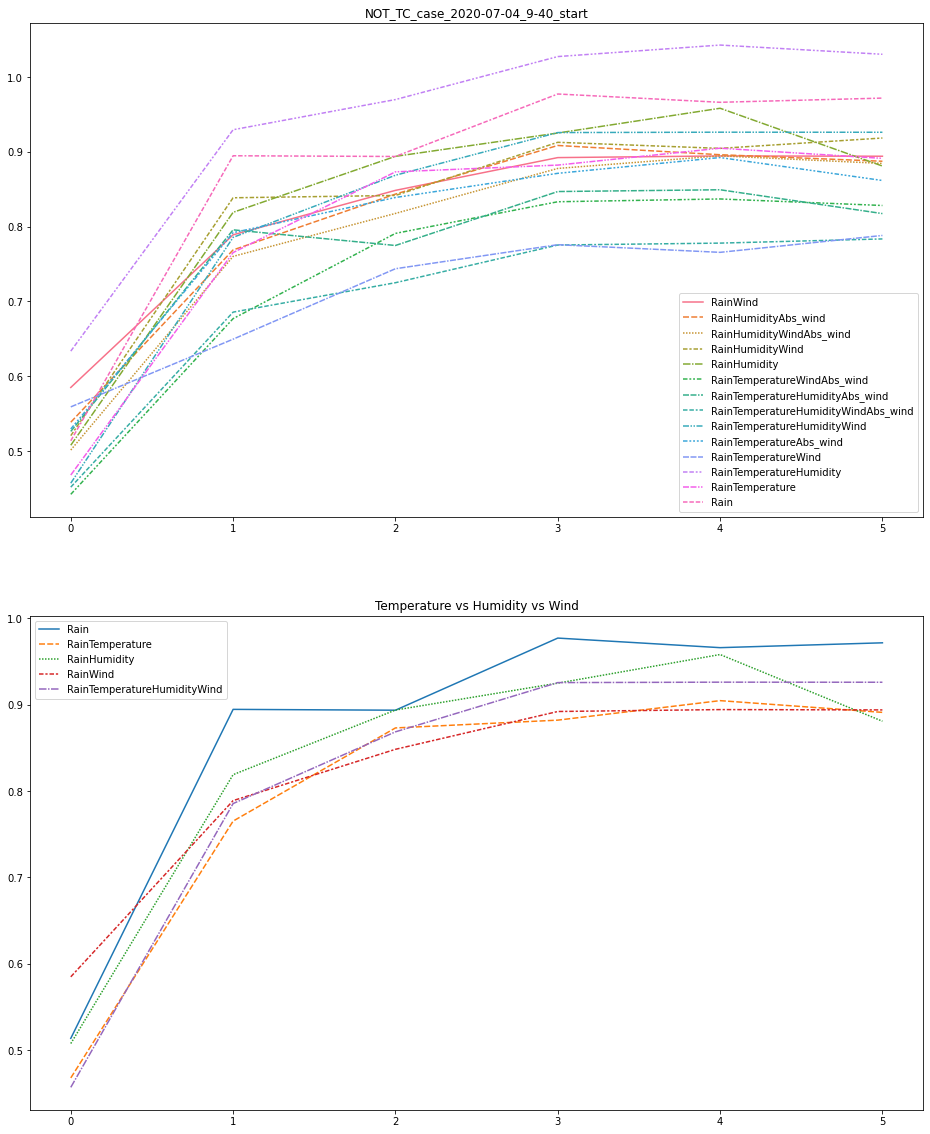

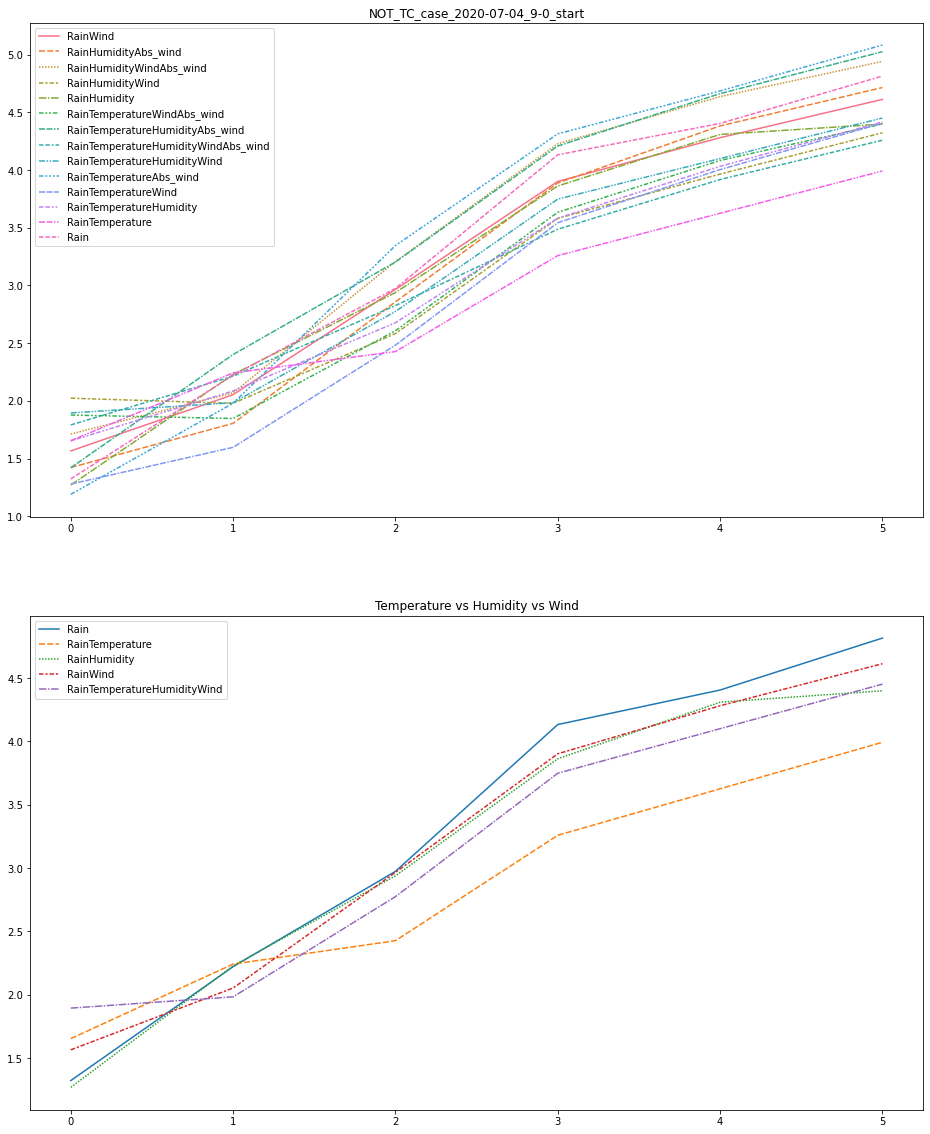

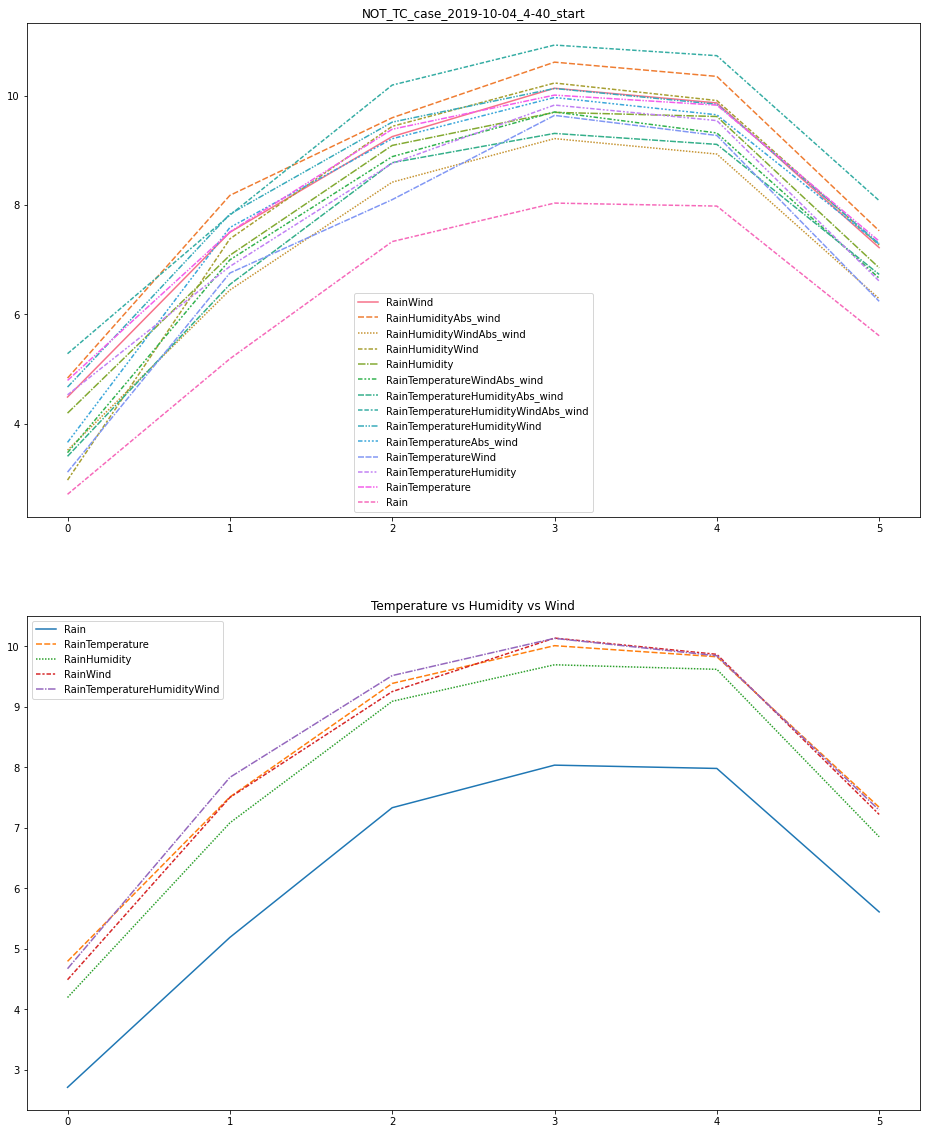

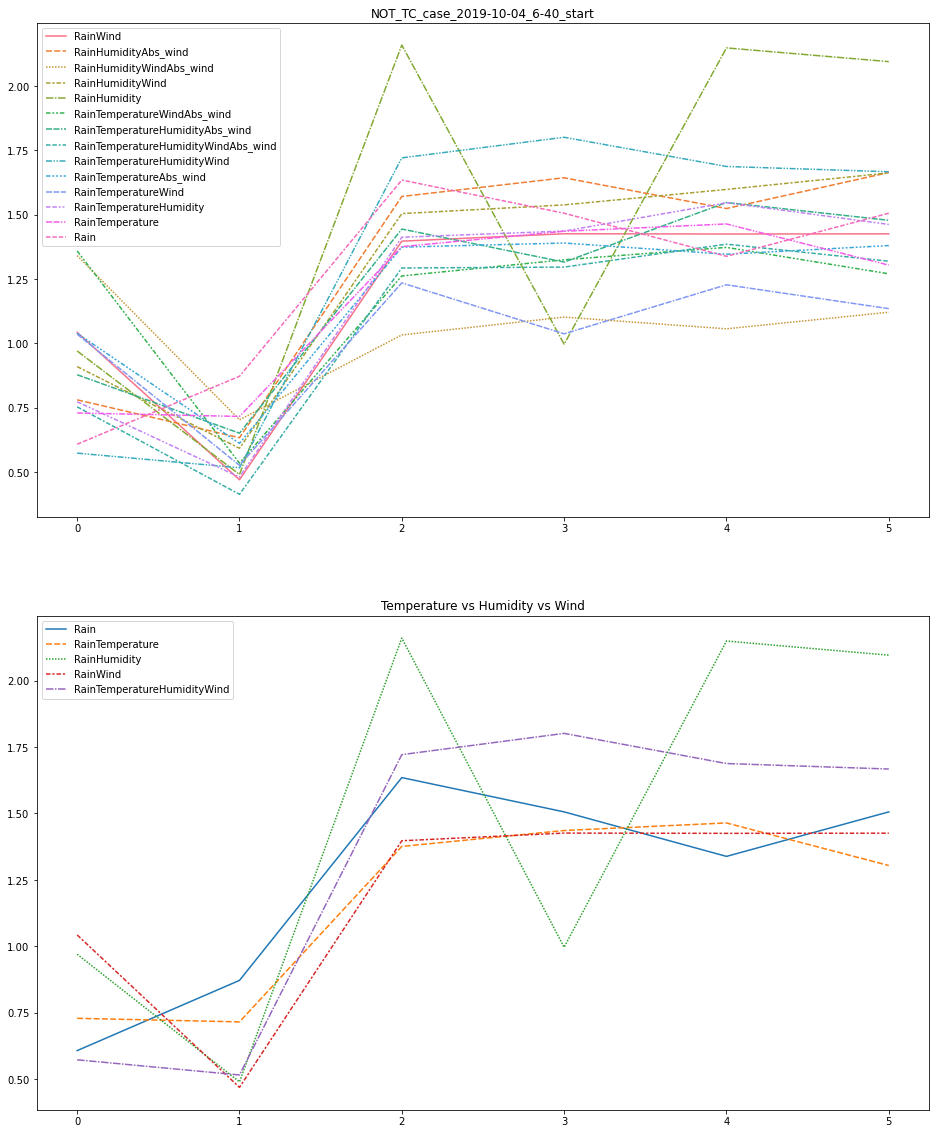

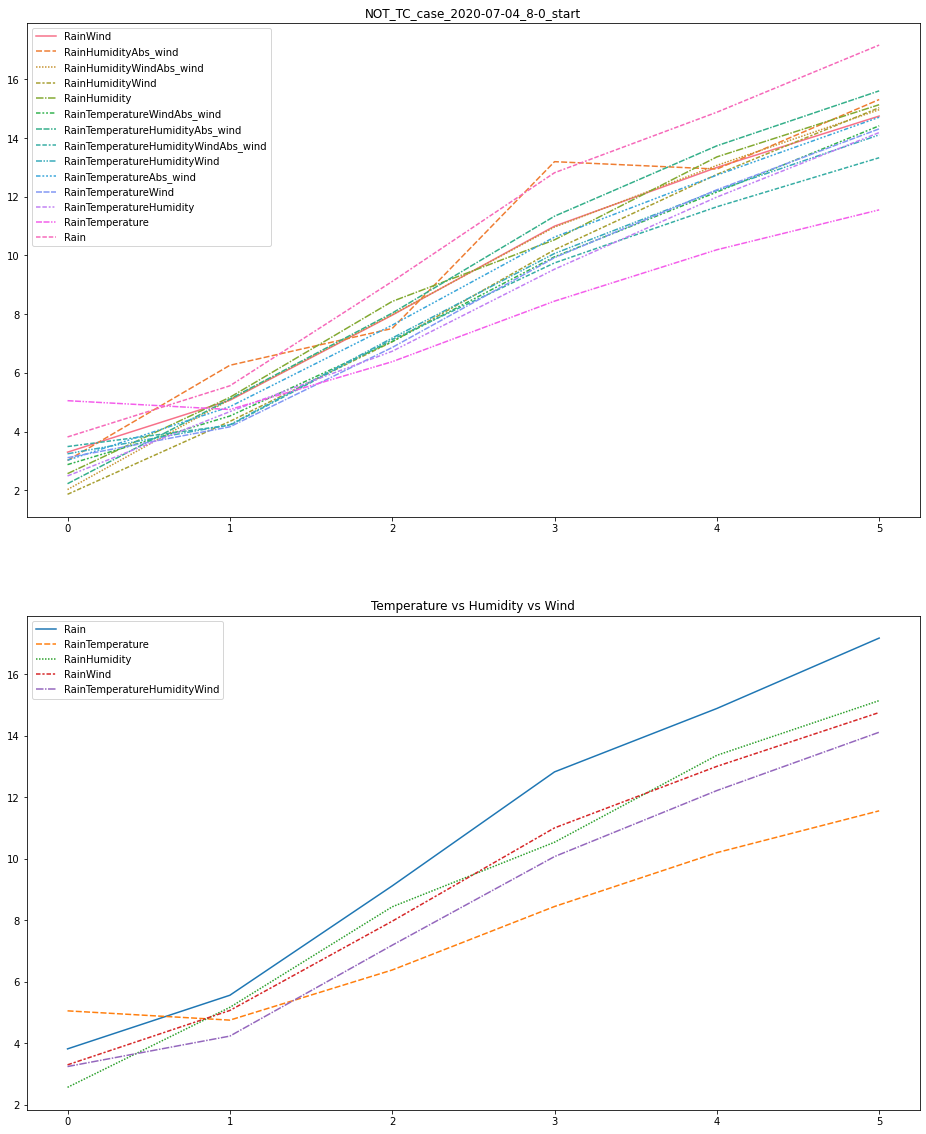

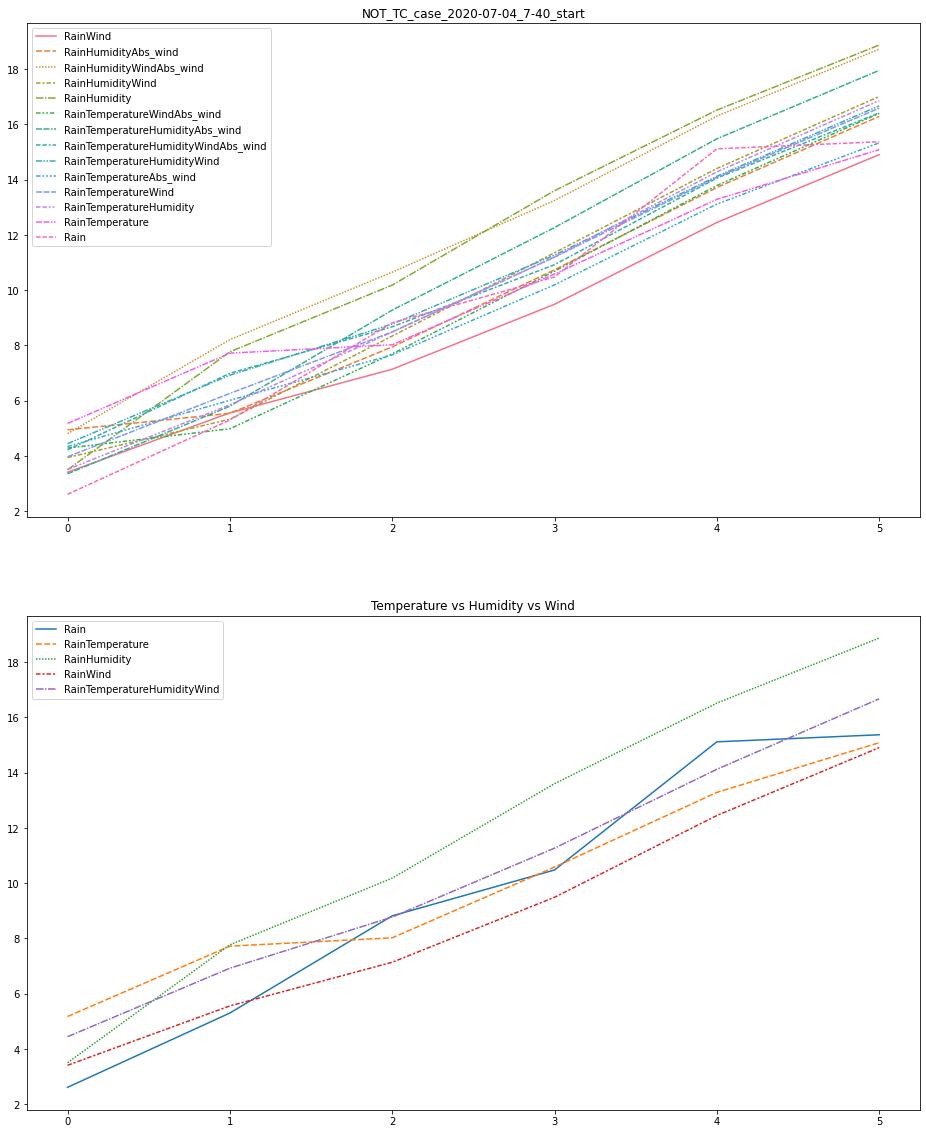

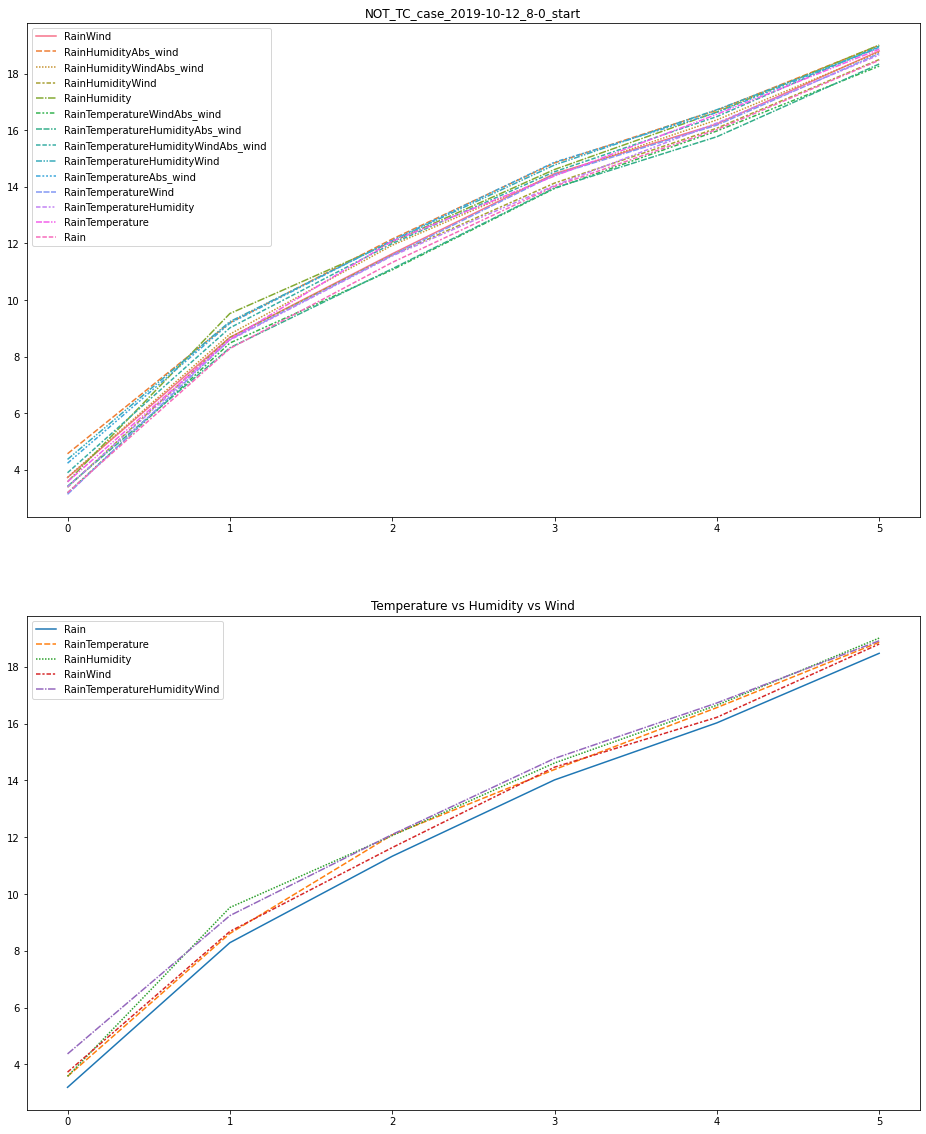

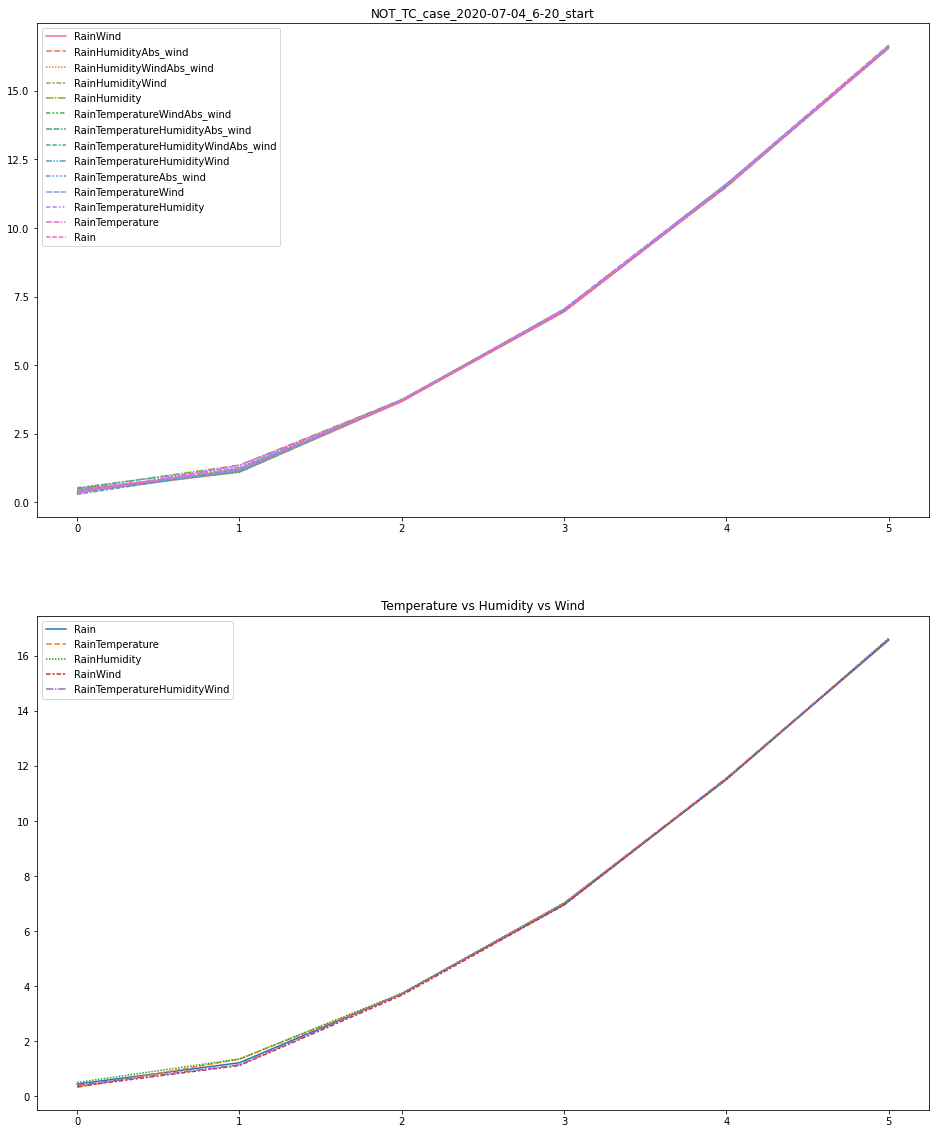

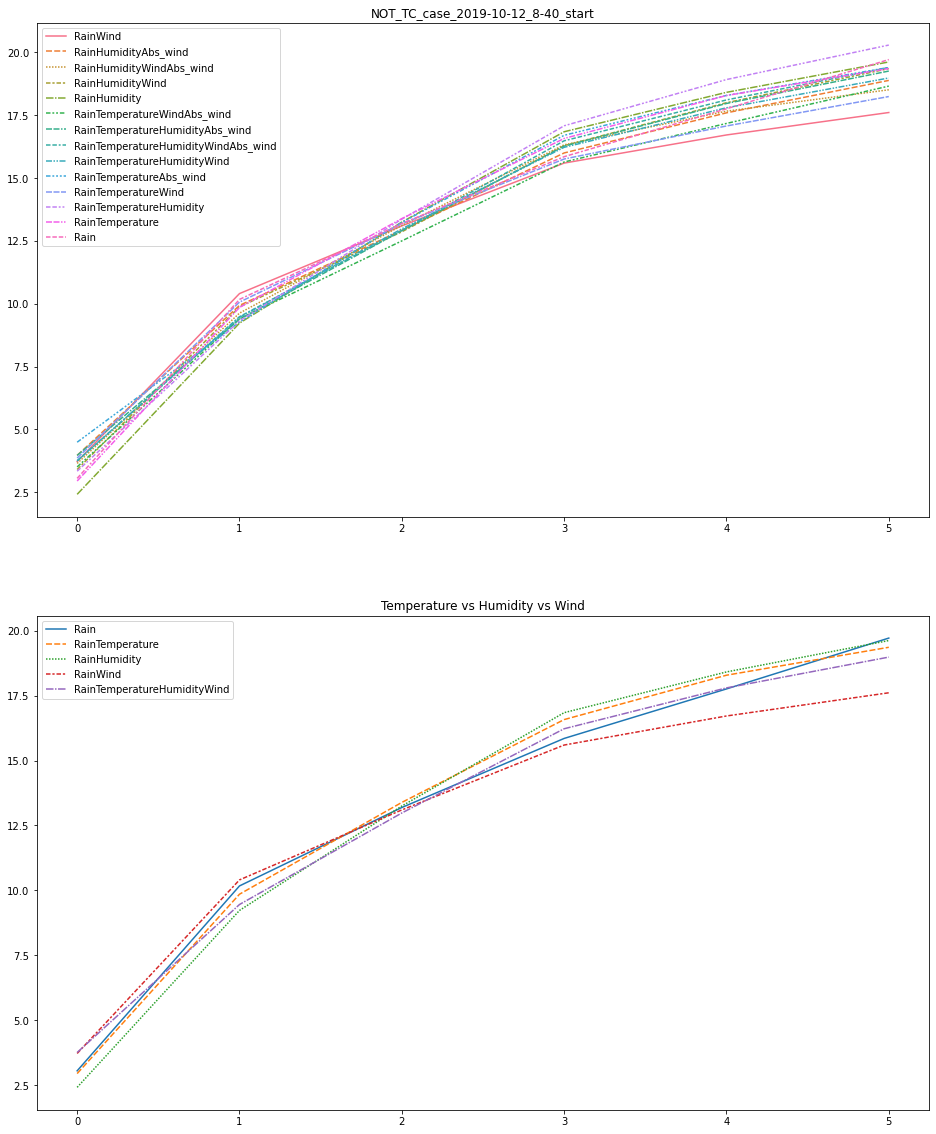

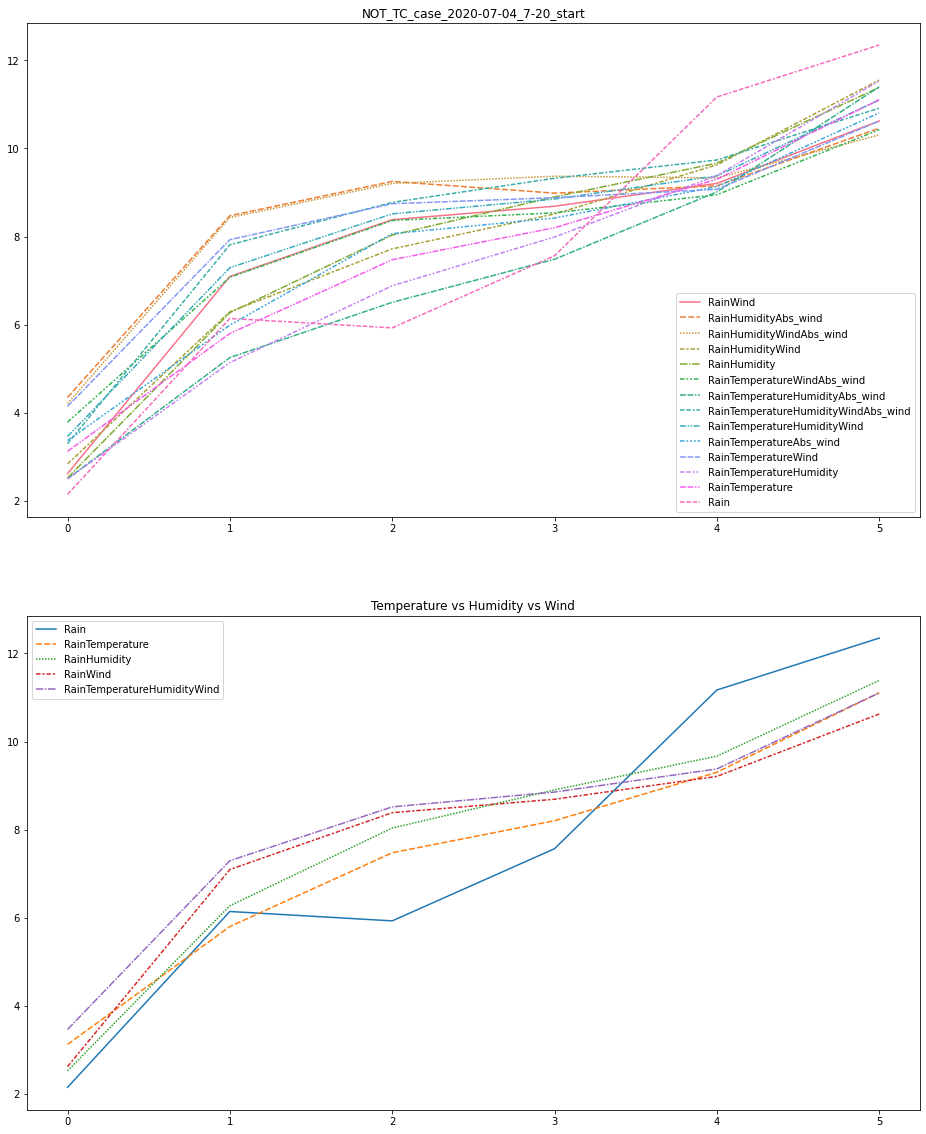

In [11]:
# NOT TC case result

not_tc_case_rmses = standard_results_dict["not_tc_case_rmses"]
case_names = list(not_tc_case_rmses["Rain"].keys())
for case_name in case_names:
    df = pd.DataFrame()
    for key, case_result in not_tc_case_rmses.items():
        target_metrics_dic = case_result[case_name]
        df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    
    # Visualize
    fig, ax = plt.subplots(2, 1, figsize=(16, 20))
    ax = ax.flatten()
    # Compare with all input parameters
    sns.lineplot(data=df, ax=ax[0])
    ax[0].set_title(case_name)
    
    # Select target parameters
    target_cols = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
    sns.lineplot(data=df[target_cols], ax=ax[1])
    ax[1].set_title("Temperature vs Humidity vs Wind")
    
    plt.savefig(f"{save_img_dir_path}/{case_name}.png")
#     # Compare with temperature
#     ## Temperature
#     hue_columns = [i for i in df.columns if "Temperature" in i]
#     other_columns = [i for i in df.columns if "Temperature" not in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[1], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[1], x=df.index, y=col, color="blue")
#     ax[1].set_title("It includes temperature (orange) or not (blue)")
#     ## Humidity
#     hue_columns = [i for i in df.columns if "Humidity" in i]
#     other_columns = [i for i in df.columns if "Humidity" not in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[2], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[2], x=df.index, y=col, color="blue")
#     ax[2].set_title("It includes humidity (orange) or not (blue)")
    
#     ## Wind (Wind & Abs_wind)
#     hue_columns = [i for i in df.columns if "Wind" in i or "Abs_wind" in i]
#     other_columns = [i for i in df.columns if "Wind" not in i or "Abs_wind" in i]
    
#     for col in hue_columns:
#         sns.lineplot(data=df, ax=ax[3], x=df.index, y=col, color="orange")
#     for col in other_columns:
#         sns.lineplot(data=df, ax=ax[3], x=df.index, y=col, color="blue")
#     ax[3].set_title("It includes wind (orange) or not (blue)")
    
    plt.show()
    plt.close()

RainWind  RainHumidityAbs_wind  RainHumidityWindAbs_wind  RainHumidityWind  \
0  1.096535              1.540422                  1.588133          1.381898   
1  3.451702              2.927838                  2.900285          2.573956   
2  3.998750              3.509341                  3.539132          3.024383   
3  4.432318              3.970970                  3.822846          3.510764   
4  4.826077              4.335072                  4.276000          3.848015   

   RainHumidity  RainTemperatureWindAbs_wind  RainTemperatureHumidityAbs_wind  \
0      1.222211                     1.716293                         2.419985   
1      2.550733                     3.396420                         3.584353   
2      3.339193                     4.074255                         4.395337   
3      4.172499                     4.588754                         4.785038   
4      4.438524                     4.844064                         5.215332   

   RainTemperatureHumidityWindAbs_wind  RainTemperatureHumidityWind  \
0                             1.740709                     1.233282   
1                             3.547632                     2.189310   
2                             3.941763                     2.719744   
3                             4.385454                     3.158643   
4                             4.621909                     3.603621   

   RainTemperatureAbs_wind  RainTemperatureWind  RainTemperatureHumidity  \
0                 1.189179             1.492725                 1.693693   
1                 3.044488             2.746014                 3.177816   
2                 3.835982             3.221902                 3.662053   
3                 4.122134             3.619163                 4.105352   
4                 4.532554             3.882931                 4.466685   

   RainTemperature      Rain  
0         1.093195  1.381345  
1         2.310554  3.167433  
2         2.712179  3.962313  
3         3.197977  4.657687  
4         3.657902  5.238339

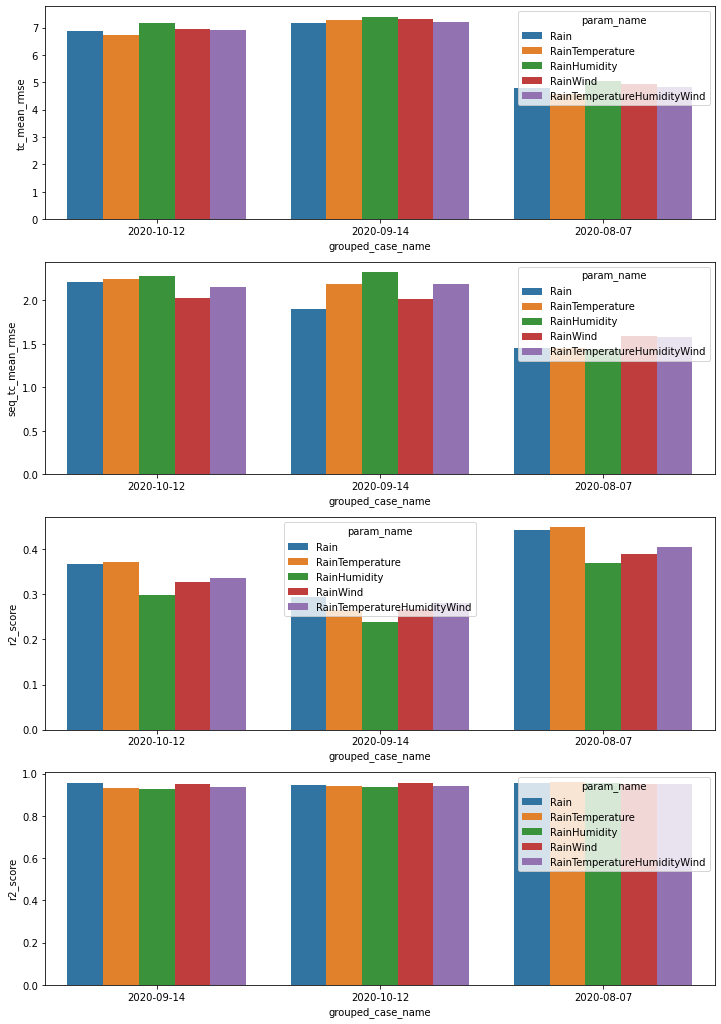

In [12]:
# TC case result
def get_grouped_case_name(case_name: str) -> str:
    if "2020-09-14" in case_name:
        return "2020-09-14"
    elif "2020-08-07" in case_name:
        return "2020-08-07"
    elif "2020-10-12" in case_name:
        return "2020-10-12"
    else:
        return "else"

seq_tc_case_rmses = standard_results_dict["seq_tc_case_rmses"]
case_names = list(tc_case_rmses["Rain"].keys())
case_mean_dic = {"tc_mean_rmse": [], "seq_tc_mean_rmse": [], "case_name": [], "param_name": []}
target_cols = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
for case_name in case_names:
    df = pd.DataFrame()
    for key, case_result in tc_case_rmses.items():
        target_metrics_dic = case_result[case_name]
        df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    seq_df = pd.DataFrame()
    for key, case_result in seq_tc_case_rmses.items():
        target_metrics_dic = case_result[f"Sequential_{case_name}"]
        seq_df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    
    for col in target_cols: 
        case_mean_dic["tc_mean_rmse"] += [df[col].mean()]
        case_mean_dic["seq_tc_mean_rmse"] += [seq_df[col].mean()]
        case_mean_dic["case_name"] += [case_name]
        case_mean_dic["param_name"] += [col]

rmse_df = pd.DataFrame(case_mean_dic)
rmse_df["grouped_case_name"] = rmse_df["case_name"].apply(get_grouped_case_name)

r2_scores = standard_results_dict["r2_scores"]
r2_dic = {"r2_score": [], "param_name": [], "case_name": [], "grouped_case_name": []}
seq_r2_dic = {"r2_score": [], "param_name": [], "case_name": [], "grouped_case_name": []}
for col in target_cols:
    target_r2_scores = r2_scores[col]
    for key, val in target_r2_scores.items():
        grouped_case_name = get_grouped_case_name(key)
        if grouped_case_name != "else":
            if "Sequential" in key:
                seq_r2_dic["param_name"].append(col)
                seq_r2_dic["case_name"].append(key)
                seq_r2_dic["grouped_case_name"].append(grouped_case_name)
                seq_r2_dic["r2_score"].append(val)
            else:
                r2_dic["param_name"].append(col)
                r2_dic["case_name"].append(key)
                r2_dic["grouped_case_name"].append(grouped_case_name)
                r2_dic["r2_score"].append(val)

tc_case_r2_df = pd.DataFrame(r2_dic)
seq_tc_case_r2_df = pd.DataFrame(seq_r2_dic)

fig, ax = plt.subplots(4, 1, figsize=(12, 18))
ax = ax.flatten()
sns.barplot(data=rmse_df, x="grouped_case_name", y="tc_mean_rmse", hue="param_name", ci=None, ax=ax[0])
sns.barplot(data=rmse_df, x="grouped_case_name", y="seq_tc_mean_rmse", hue="param_name", ci=None, ax=ax[1])
sns.barplot(data=tc_case_r2_df, x="grouped_case_name", y="r2_score", hue="param_name", ci=None, ax=ax[2])
sns.barplot(data=seq_tc_case_r2_df, x="grouped_case_name", y="r2_score", hue="param_name", ci=None, ax=ax[3])
# Use Barplot with grouping

plt.savefig(f"{save_img_dir_path}/tc_case_r2_scores.png")

df.head()

In [ ]:
tc_case_r2_df

r2_score                   param_name            case_name  \
0      0.285                         Rain  r2_2020-10-12_cases   
1      0.134                         Rain  r2_2020-08-07_cases   
2      0.236                         Rain  r2_2020-09-14_cases   
3      0.293              RainTemperature  r2_2020-10-12_cases   
4      0.149              RainTemperature  r2_2020-08-07_cases   
5      0.297              RainTemperature  r2_2020-09-14_cases   
6      0.224                 RainHumidity  r2_2020-10-12_cases   
7      0.295                 RainHumidity  r2_2020-08-07_cases   
8      0.335                 RainHumidity  r2_2020-09-14_cases   
9      0.346                     RainWind  r2_2020-10-12_cases   
10     0.245                     RainWind  r2_2020-08-07_cases   
11     0.370                     RainWind  r2_2020-09-14_cases   
12     0.378  RainTemperatureHumidityWind  r2_2020-10-12_cases   
13     0.257  RainTemperatureHumidityWind  r2_2020-08-07_cases   
14     0.280  RainTemperatureHumidityWind  r2_2020-09-14_cases   

   grouped_case_name  
0         2020-10-12  
1         2020-08-07  
2         2020-09-14  
3         2020-10-12  
4         2020-08-07  
5         2020-09-14  
6         2020-10-12  
7         2020-08-07  
8         2020-09-14  
9         2020-10-12  
10        2020-08-07  
11        2020-09-14  
12        2020-10-12  
13        2020-08-07  
14        2020-09-14

RainWind  RainHumidityAbs_wind  RainHumidityWindAbs_wind  RainHumidityWind  \
0  2.614858              4.344511                  4.203248          2.835574   
1  7.092417              8.472685                  8.430525          6.290953   
2  8.383065              9.251541                  9.206294          7.719504   
3  8.688578              8.986096                  9.371014          8.511983   
4  9.206851              9.152986                  9.331537          9.627524   

   RainHumidity  RainTemperatureWindAbs_wind  RainTemperatureHumidityAbs_wind  \
0      2.518528                     3.785592                         2.499027   
1      6.270366                     7.074590                         5.250952   
2      8.033446                     8.365094                         6.506067   
3      8.901245                     8.538947                         7.484366   
4      9.666856                     8.949049                         9.013084   

   RainTemperatureHumidityWindAbs_wind  RainTemperatureHumidityWind  \
0                             3.295010                     3.458818   
1                             7.812862                     7.291887   
2                             8.775369                     8.515191   
3                             9.324254                     8.851473   
4                             9.739294                     9.377489   

   RainTemperatureAbs_wind  RainTemperatureWind  RainTemperatureHumidity  \
0                 3.364883             4.140959                 2.493485   
1                 5.988337             7.928573                 5.136117   
2                 8.065570             8.745270                 6.881716   
3                 8.419998             8.882593                 7.988264   
4                 9.134507             9.073046                 9.385560   

   RainTemperature       Rain  
0         3.120106   2.144583  
1         5.797238   6.139019  
2         7.472599   5.925653  
3         8.200443   7.564830  
4         9.301377  11.169251

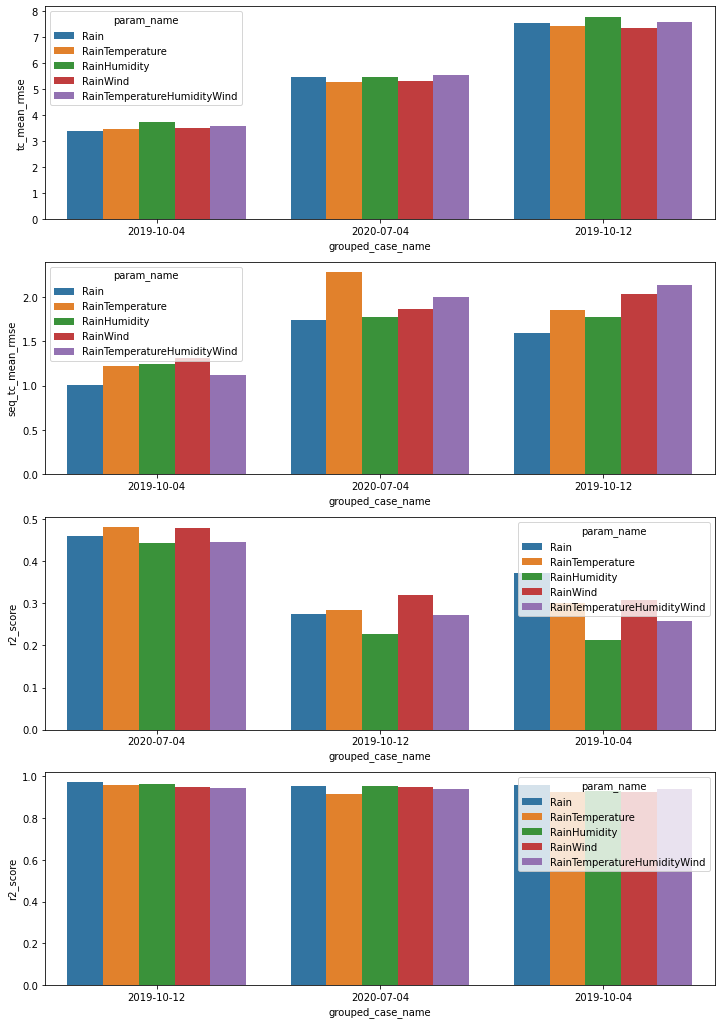

In [13]:
# NOT TC case result
def get_grouped_case_name(case_name: str) -> str:
    if "2019-10-04" in case_name:
        return "2019-10-04"
    elif "2020-07-04" in case_name:
        return "2020-07-04"
    elif "2019-10-12" in case_name:
        return "2019-10-12"
    else:
        return "else"

seq_not_tc_case_rmses = standard_results_dict["seq_not_tc_case_rmses"]
case_names = list(not_tc_case_rmses["Rain"].keys())
case_mean_dic = {"tc_mean_rmse": [], "seq_tc_mean_rmse": [], "case_name": [], "param_name": []}
target_cols = ["Rain", "RainTemperature", "RainHumidity", "RainWind", "RainTemperatureHumidityWind"]
for case_name in case_names:
    df = pd.DataFrame()
    for key, case_result in not_tc_case_rmses.items():
        target_metrics_dic = case_result[case_name]
        df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    seq_df = pd.DataFrame()
    for key, case_result in seq_not_tc_case_rmses.items():
        target_metrics_dic = case_result[f"Sequential_{case_name}"]
        seq_df[key] = [v for k, v in sorted(target_metrics_dic.items(), key=lambda item: item[0])]
    
    for col in target_cols: 
        case_mean_dic["tc_mean_rmse"] += [df[col].mean()]
        case_mean_dic["seq_tc_mean_rmse"] += [seq_df[col].mean()]
        case_mean_dic["case_name"] += [case_name]
        case_mean_dic["param_name"] += [col]

rmse_df = pd.DataFrame(case_mean_dic)
rmse_df["grouped_case_name"] = rmse_df["case_name"].apply(get_grouped_case_name)

r2_dic = {"r2_score": [], "param_name": [], "case_name": [], "grouped_case_name": []}
seq_r2_dic = {"r2_score": [], "param_name": [], "case_name": [], "grouped_case_name": []}
for col in target_cols:
    target_r2_scores = r2_scores[col]
    for key, val in target_r2_scores.items():
        grouped_case_name = get_grouped_case_name(key)
        if grouped_case_name != "else":
            if "Sequential" in key:
                seq_r2_dic["param_name"].append(col)
                seq_r2_dic["case_name"].append(key)
                seq_r2_dic["grouped_case_name"].append(grouped_case_name)
                seq_r2_dic["r2_score"].append(val)
            else:
                r2_dic["param_name"].append(col)
                r2_dic["case_name"].append(key)
                r2_dic["grouped_case_name"].append(grouped_case_name)
                r2_dic["r2_score"].append(val)

not_tc_case_r2_df = pd.DataFrame(r2_dic)
seq_tc_case_r2_df = pd.DataFrame(seq_r2_dic)

fig, ax = plt.subplots(4, 1, figsize=(12, 18))
ax = ax.flatten()
sns.barplot(data=rmse_df, x="grouped_case_name", y="tc_mean_rmse", hue="param_name", ci=None, ax=ax[0])
sns.barplot(data=rmse_df, x="grouped_case_name", y="seq_tc_mean_rmse", hue="param_name", ci=None, ax=ax[1])
sns.barplot(data=not_tc_case_r2_df, x="grouped_case_name", y="r2_score", hue="param_name", ci=None, ax=ax[2])
sns.barplot(data=seq_tc_case_r2_df, x="grouped_case_name", y="r2_score", hue="param_name", ci=None, ax=ax[3])
# Use Barplot with grouping

plt.savefig(f"{save_img_dir_path}/not_tc_case_r2_scores.png")
df.head()